In [1]:
#This notebook will be implement Maxent CE dynamic gradient ascent to calculate nash eq. for dynamic 1v1's
#These games must be zero sum!

#Here will construct our aysmmetric matrix from csv file and map it to our action space
import numpy as np
import csv
np.set_printoptions(precision=3, suppress=True)


#This will be our meta_game action space
p1_space = []
p2_space = []

file = 'NeutralMatchup.csv'
#We will survey the csv file to fill our action space
with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        if row['Player1'] not in p1_space:
            p1_space.append(row['Player1'])
        
        if row['Player2'] not in p2_space:
            p2_space.append(row['Player2'])

#Create action_to_index utility dictionary
index = 0
p1_to_index = {}
for action in p1_space:
    p1_to_index[action] = index
    index += 1
    
index = 0
p2_to_index = {}
for action in p2_space:
    p2_to_index[action] = index
    index += 1

#We will generate our dual variables, keep in mind each player has different options
dual_variables = {}
for p1_action in p1_space:
    for p1_alt in p1_space:
        if p1_action is not p1_alt:
            joint_action = (1, p1_action, p1_alt)
            dual_variables[joint_action] = 0
            
for p2_action in p2_space:
    for p2_alt in p2_space:
        if p2_action is not p2_alt:
            joint_action = (2, p2_action, p2_alt)
            dual_variables[joint_action] = 0
print(dual_variables)
#Generate union action space
action_space = []
for action in p1_space:
    action_space.append(action)

for action in p2_space:
    action_space.append(action)

{(1, 'Bair', 'Fair'): 0, (1, 'Bair', 'DA'): 0, (1, 'Bair', 'Grab'): 0, (1, 'Bair', 'Nair'): 0, (1, 'Bair', 'Turnip'): 0, (1, 'Fair', 'Bair'): 0, (1, 'Fair', 'DA'): 0, (1, 'Fair', 'Grab'): 0, (1, 'Fair', 'Nair'): 0, (1, 'Fair', 'Turnip'): 0, (1, 'DA', 'Bair'): 0, (1, 'DA', 'Fair'): 0, (1, 'DA', 'Grab'): 0, (1, 'DA', 'Nair'): 0, (1, 'DA', 'Turnip'): 0, (1, 'Grab', 'Bair'): 0, (1, 'Grab', 'Fair'): 0, (1, 'Grab', 'DA'): 0, (1, 'Grab', 'Nair'): 0, (1, 'Grab', 'Turnip'): 0, (1, 'Nair', 'Bair'): 0, (1, 'Nair', 'Fair'): 0, (1, 'Nair', 'DA'): 0, (1, 'Nair', 'Grab'): 0, (1, 'Nair', 'Turnip'): 0, (1, 'Turnip', 'Bair'): 0, (1, 'Turnip', 'Fair'): 0, (1, 'Turnip', 'DA'): 0, (1, 'Turnip', 'Grab'): 0, (1, 'Turnip', 'Nair'): 0, (2, 'Fair', 'Nair'): 0, (2, 'Fair', 'DA'): 0, (2, 'Fair', 'Grab'): 0, (2, 'Nair', 'Fair'): 0, (2, 'Nair', 'DA'): 0, (2, 'Nair', 'Grab'): 0, (2, 'DA', 'Fair'): 0, (2, 'DA', 'Nair'): 0, (2, 'DA', 'Grab'): 0, (2, 'Grab', 'Fair'): 0, (2, 'Grab', 'Nair'): 0, (2, 'Grab', 'DA'): 0}


In [2]:
#Here will construct our aysmmetric matrix from csv file and map it to our action space
import numpy as np
import csv
np.set_printoptions(precision=3, suppress=True)

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    #Create two dictionaries to keep track of wins and losses over matches
    matches = []
    wins_i = {}
    wins_j = {}
    
    for row in csv_reader:
        i = row["Player1"]
        j = row["Player2"]
        match = (i, j)
        win_i = float(row["Wins"])
        win_j = float(row["Loss"])
        
        if (i in p1_space) and (j in p2_space):
            if match in matches:
                wins_i[match] += win_i
                wins_j[match] += win_j
            else:
                matches.append(match)
                wins_i[match] = win_i
                wins_j[match] = win_j

#Create payoff matrix
M = np.full((len(p1_space), len(p2_space)), 0.5)
for match, win_i in wins_i.items():
    win_j = wins_j[match]
    payout = win_i/(win_i + win_j)
    print(match, ": ", payout)
    name_i, name_j = match
    
    #Soften payout
    epsilon = 0.01
    if payout == 0.0:
        payout += epsilon
    elif payout == 1.0:
        payout -= epsilon
    
    M[p1_to_index[name_i]][p2_to_index[name_j]] = payout

#Before logit space
print(M)
#Create logit space
M = np.log(M/(1-M))
print(M)

('Bair', 'Fair') :  0.3
('Fair', 'Fair') :  0.5
('DA', 'Fair') :  0.35
('Grab', 'Fair') :  0.01
('Nair', 'Fair') :  0.2
('Turnip', 'Fair') :  0.7
('Bair', 'Nair') :  0.4
('Fair', 'Nair') :  0.3
('DA', 'Nair') :  0.3
('Grab', 'Nair') :  0.01
('Nair', 'Nair') :  0.4
('Turnip', 'Nair') :  0.7
('Bair', 'DA') :  0.6
('Fair', 'DA') :  0.6
('DA', 'DA') :  0.4
('Grab', 'DA') :  0.01
('Nair', 'DA') :  0.65
('Turnip', 'DA') :  0.4
('Bair', 'Grab') :  0.7
('Fair', 'Grab') :  0.7
('DA', 'Grab') :  0.6
('Grab', 'Grab') :  0.01
('Nair', 'Grab') :  0.6
('Turnip', 'Grab') :  0.1
[[0.3  0.4  0.6  0.7 ]
 [0.5  0.3  0.6  0.7 ]
 [0.35 0.3  0.4  0.6 ]
 [0.01 0.01 0.01 0.01]
 [0.2  0.4  0.65 0.6 ]
 [0.7  0.7  0.4  0.1 ]]
[[-0.847 -0.405  0.405  0.847]
 [ 0.    -0.847  0.405  0.847]
 [-0.619 -0.847 -0.405  0.405]
 [-4.595 -4.595 -4.595 -4.595]
 [-1.386 -0.405  0.619  0.405]
 [ 0.847  0.847 -0.405 -2.197]]


In [3]:
def payoff(action_1, action_2):
    return M[p1_to_index[action_1]][p2_to_index[action_2]]

def payoff_gain(alt_action, action, player=1):
    #Calculate M(alt_action, action') & M(action, action')
    diff = 0 
    #opponents action space
    space = p2_space
    if player == 2:
        space = p1_space
        
    for action_op in space:
        if player == 1:
            M_alt = payoff(alt_action, action_op)
            M_act = payoff(action, action_op)
            diff += M_alt - M_act
        else:
            M_alt = 1 - payoff(action_op, alt_action)
            M_act = 1 - payoff(action_op, action)
            diff += M_alt - M_act
    return diff

#Return Z(lambda) of dual variables
def Z(dv):
    sum_one = 0
    sum_two = 0
    
    #Split the sums
    for action in p1_space:
        loop_sum = 0
        for action_alt in p1_space:
            if action is not action_alt:
                loop_sum += dv[(1, action, action_alt)] * payoff_gain(action_alt, action, player=1)
        sum_one += np.exp(-loop_sum)
    
    for action in p2_space:
        loop_sum = 0
        for action_alt in p2_space:
            if action is not action_alt:
                loop_sum += dv[(2, action, action_alt)] * payoff_gain(action_alt, action, player=2)
        sum_two += np.exp(-loop_sum)
        
    return sum_one, sum_two

#Get mixed strategy from dual variables
def P(dv, a, player=1):
    sum_one = 0
    if player == 1:
        for action_alt in p1_space:
            if action_alt != a:
                sum_one += dv[(1, a, action_alt)]*payoff_gain(action_alt, a, player=1)
    elif player == 2:
        for action_alt in p2_space:
            if action_alt != a:
                sum_one += dv[(2, a, action_alt)]*payoff_gain(action_alt, a, player=2)
    
    Z1, Z2 = Z(dv)
    z = Z1
    if player == 2:
        z = Z2
        
    log_P = -sum_one - np.log(z)
    return np.exp(log_P)

In [4]:
#Test our functions
print(payoff("Grab", "Fair"))
print(payoff_gain("Fair", "Grab", player=1))
print(P(dual_variables, "Fair", player=2))

-4.59511985013459
18.785944508646523
0.25


In [5]:
#Regret Calculation
def regret_both(dv, action, action_prime, player=1):
    P_a = P(dv, action, player=player)
    p = 0
    n = 0
    
    if player == 1:
        for p2_action in p2_space:
            P_p2 = P(dv, p2_action, player=2)
            p_gain = payoff(action_prime, p2_action) - payoff(action, p2_action)

            p += (P_a*P_p2) * max(0, p_gain)
            n += (P_a*P_p2) * max(0, -p_gain)
    else:
        for p1_action in p1_space:
            P_p1 = P(dv, p1_action, player=1)
            p_gain = (1 - payoff(p1_action, action_prime)) - (1- payoff(p1_action, action))

            p += (P_a*P_p1) * max(0, p_gain)
            n += (P_a*P_p1) * max(0, -p_gain)
        
    return p, n

In [6]:
print(regret_both(dual_variables, "Fair", "Nair", player=1))

(0.027308618857379115, 0.07617196305828874)


In [7]:
#Calculate lower bound c

def abs_gain(action, action_prime, player=1):
    total = 0
    if player == 1:
        for p2_action in p2_space:
            p_gain = abs(payoff(action_prime, p2_action) - payoff(action, p2_action))
            total += p_gain
    else:
        for p1_action in p1_space:
            p_gain = abs((1- payoff(p1_action, action_prime)) - (1-payoff(p1_action, action)))
            total += p_gain
    
    return total
        
def lower_bound_c():
    bound = 0
    for action in p1_space:
        for action_prime in p1_space:
            a_gain = abs_gain(action, action_prime, player=1)
            if a_gain > bound:
                bound = a_gain
    
    for action in p2_space:
        for action_prime in p2_space:
            a_gain = abs_gain(action, action_prime, player=2)
            if a_gain > bound:
                bound = a_gain
    return bound 

In [8]:
print(abs_gain("Fair", "DA", player=1))
print(lower_bound_c())

1.8718021769015913
18.785944508646523


In [9]:
#Dynamic Step-Size Gradient Ascent from Section 4.1 of 
#http://rob.schapire.net/papers/correl-equil.pdf

from tqdm import tqdm 

def sort_dictionary(d):
    sorted_x = sorted(d.items(), key=lambda kv: kv[1])
    return sorted_x

def plot(dv):
    probs1 = {}
    probs2 = {}
    for action in p1_space:
        probs1[action] = P(dv,action,player=1)
        
    for action in p2_space:
        probs2[action] = P(dv,action,player=2)
    
    import matplotlib.pyplot as plt; plt.rcdefaults()
    import numpy as np
    import matplotlib.pyplot as plt

    sort1 = sort_dictionary(probs1)
    sort2 = sort_dictionary(probs2)
    #For tier lists
    objects1 = []
    performance1 = []
    objects2 = []
    performance2 = []
    
    for action, value in sort1:
        objects1.append(action)
        performance1.append(value)
    
    for action, value in sort2:
        objects2.append(action)
        performance2.append(value)


    y_pos = np.arange(len(objects1))
    plt.barh(y_pos, performance1, align="center")
    plt.yticks(y_pos, objects1)
    plt.xlabel('Density')
    plt.ylabel('Strategies')
    plt.title('Peach Policy')

    plt.show()
    
    y_pos = np.arange(len(objects2))
    plt.barh(y_pos, performance2, align="center")
    plt.yticks(y_pos, objects2)
    plt.xlabel('Density')
    plt.ylabel('Strategies')
    plt.title('Marth Policy')

    plt.show()
    
def log_grad_descent(dv, rounds=10, verbose=True):
    c = lower_bound_c()
    
    for it in tqdm(range(rounds)):
        step_dict = {}
        for action in p1_space:
            for action_prime in p1_space:
                if action != action_prime:
                    r_pos, r_neg = regret_both(dv, action, action_prime, player=1)

                    #print("Joint Action: ", (action, action_prime))
                    #print("r_pos: ", r_pos)
                    #print("r_neg: ", r_neg)
                    
                    term = ((r_pos)/(r_pos + r_neg)) - (1/2)
        
                    
                    step = (1/c)*term
                    
                    step_dict[(1, action, action_prime)] = step
        
        for action in p2_space:
            for action_prime in p2_space:
                if action != action_prime:
                    r_pos, r_neg = regret_both(dv, action, action_prime, player=2)

                    #print("Joint Action: ", (action, action_prime))
                    #print("r_pos: ", r_pos)
                    #print("r_neg: ", r_neg)
                    
                    term = ((r_pos)/(r_pos + r_neg)) - (1/2)
        
                    
                    step = (1/c)*term
                    
                    step_dict[(2, action, action_prime)] = step
                
        for action in p1_space:
            for action_prime in p1_space:
                if action != action_prime:
                    dv[(1, action, action_prime)] = max(0, dv[(1, action, action_prime)] + step_dict[(1, action, action_prime)])
        
        for action in p2_space:
            for action_prime in p2_space:
                if action != action_prime:
                    dv[(2, action, action_prime)] = max(0, dv[(2, action, action_prime)] + step_dict[(2, action, action_prime)])
                
        if verbose:
            print("Iteration ", it)
            plot(dv)

  0%|          | 0/100 [00:00<?, ?it/s]

Iteration  0


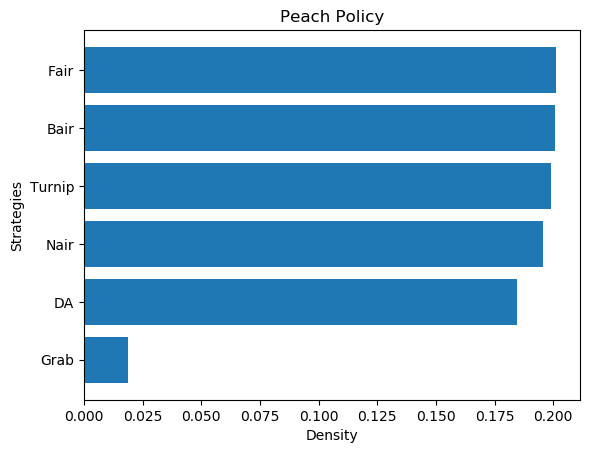

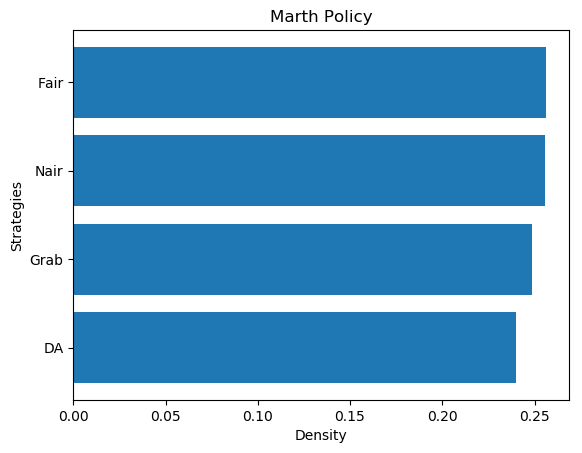

  1%|          | 1/100 [00:00<00:38,  2.60it/s]

Iteration  1


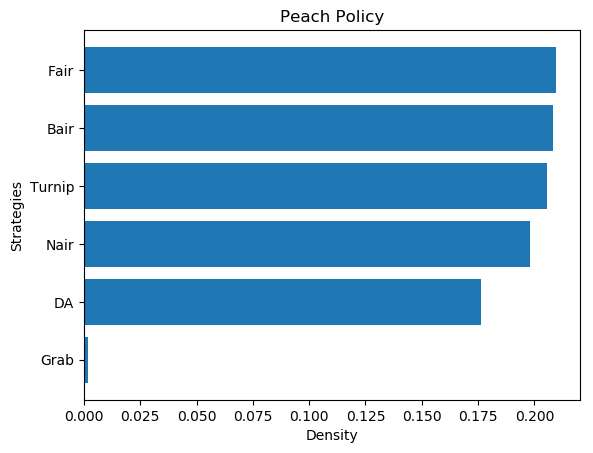

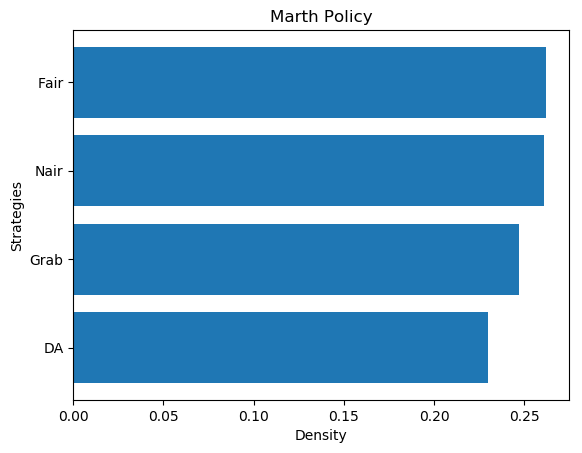

  2%|▏         | 2/100 [00:00<00:36,  2.65it/s]

Iteration  2


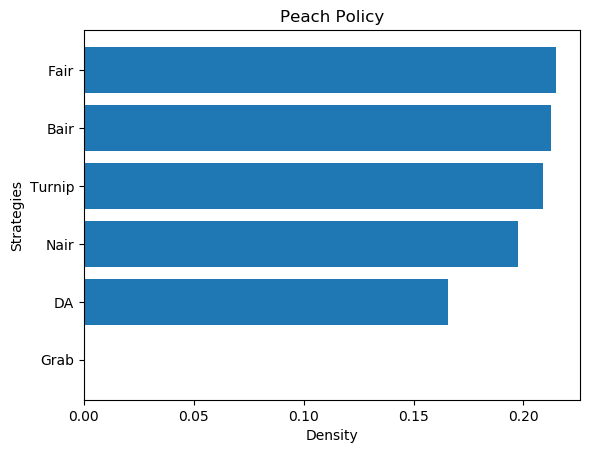

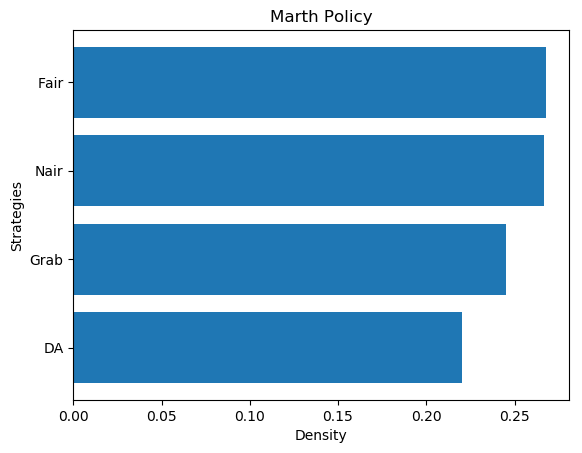

  3%|▎         | 3/100 [00:01<00:37,  2.59it/s]

Iteration  3


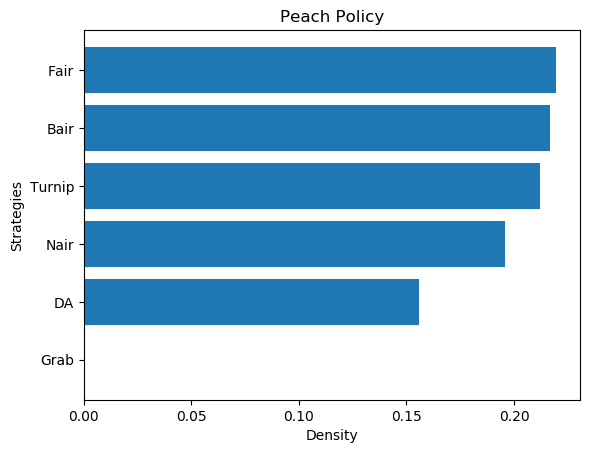

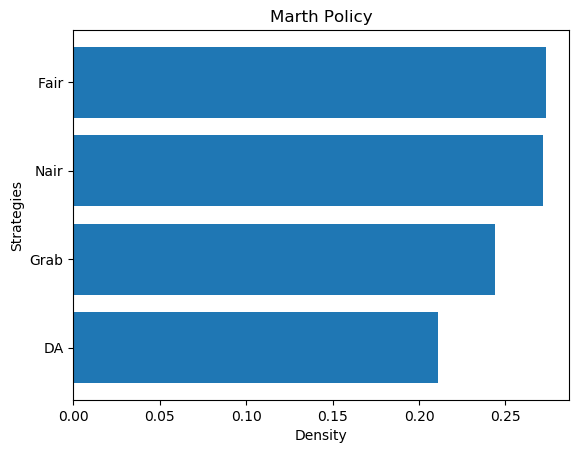

  4%|▍         | 4/100 [00:01<00:35,  2.70it/s]

Iteration  4


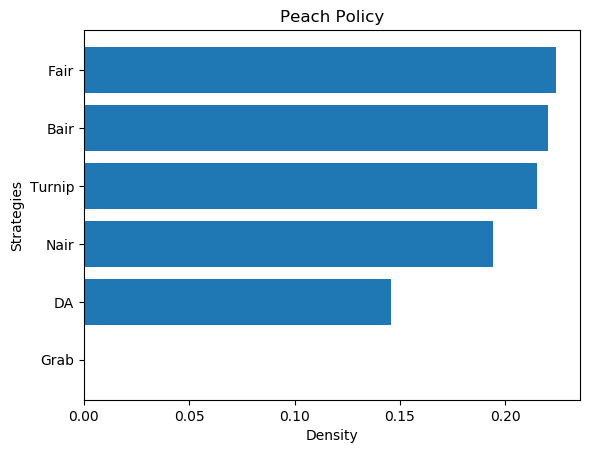

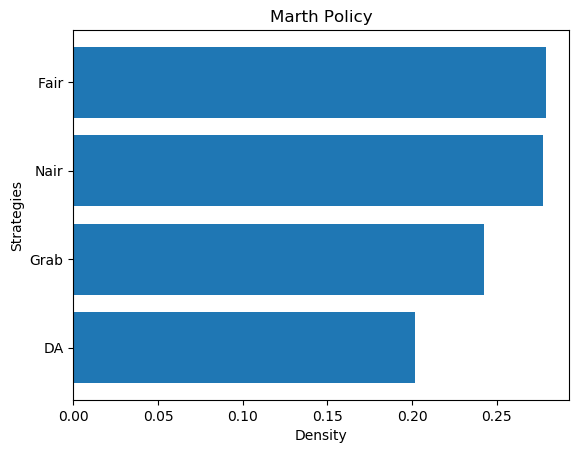

  5%|▌         | 5/100 [00:01<00:32,  2.88it/s]

Iteration  5


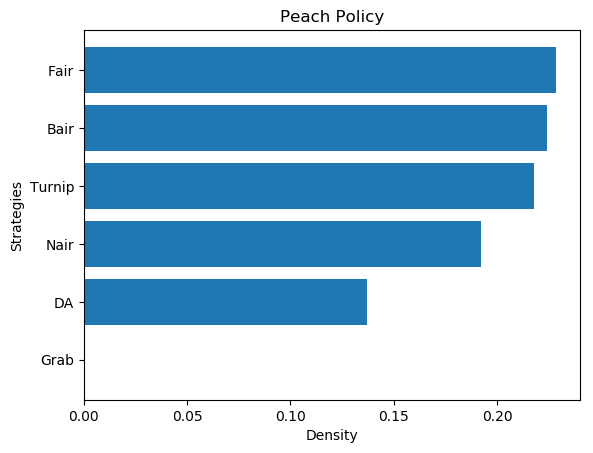

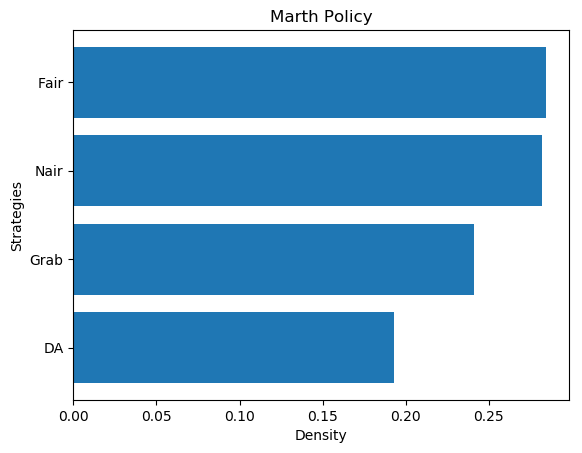

  6%|▌         | 6/100 [00:02<00:31,  3.02it/s]

Iteration  6


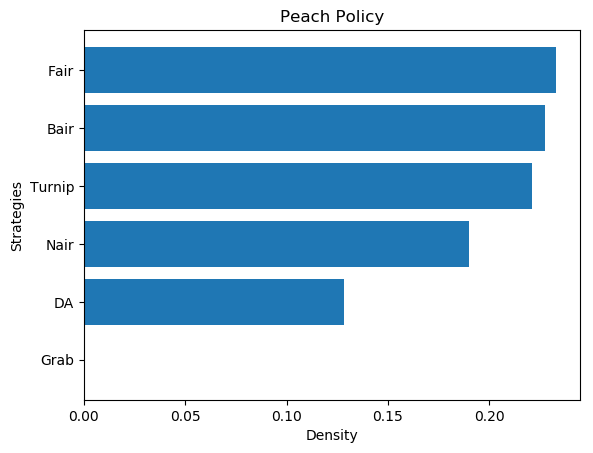

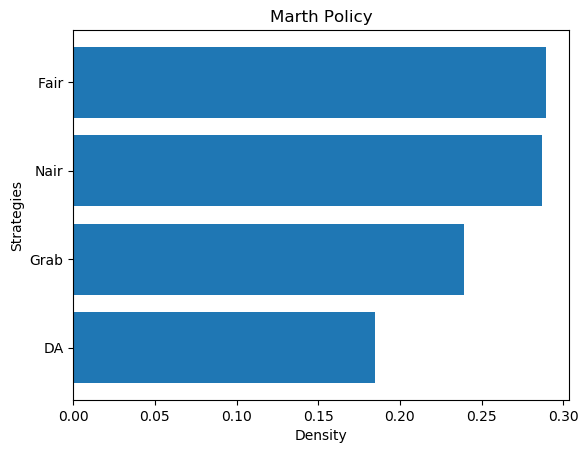

  7%|▋         | 7/100 [00:02<00:30,  3.01it/s]

Iteration  7


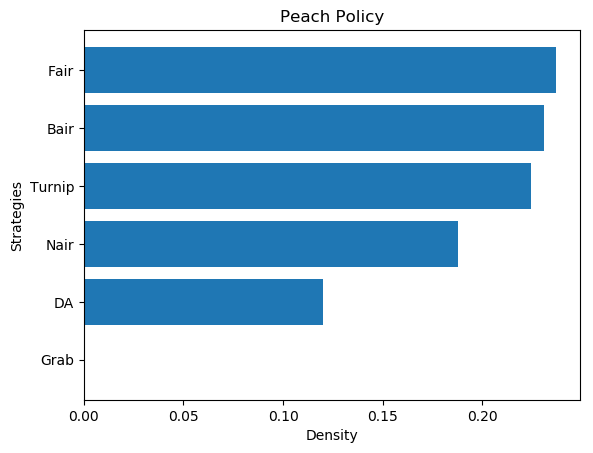

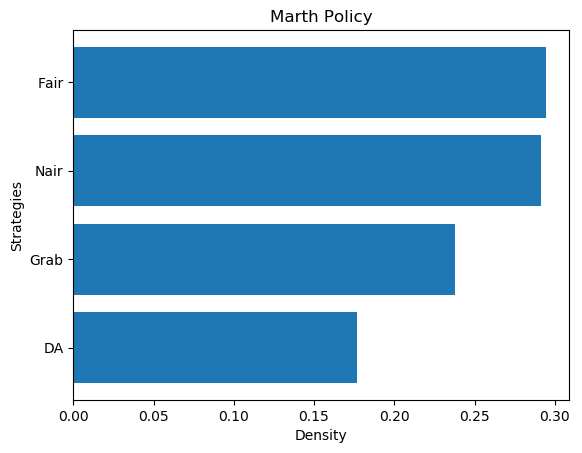

  8%|▊         | 8/100 [00:02<00:29,  3.11it/s]

Iteration  8


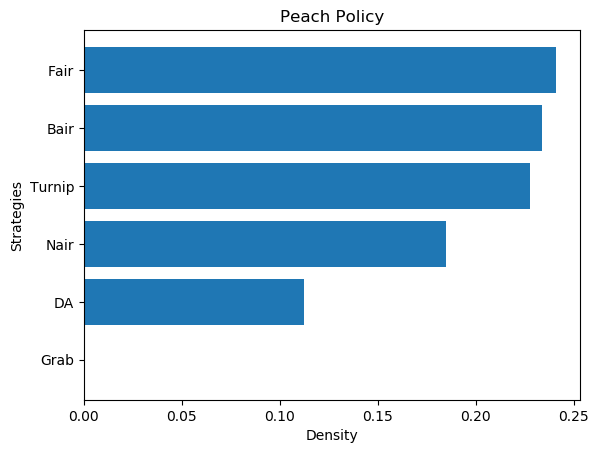

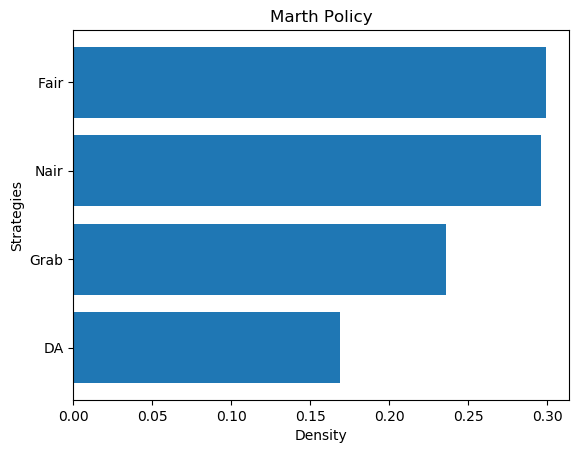

  9%|▉         | 9/100 [00:03<00:29,  3.06it/s]

Iteration  9


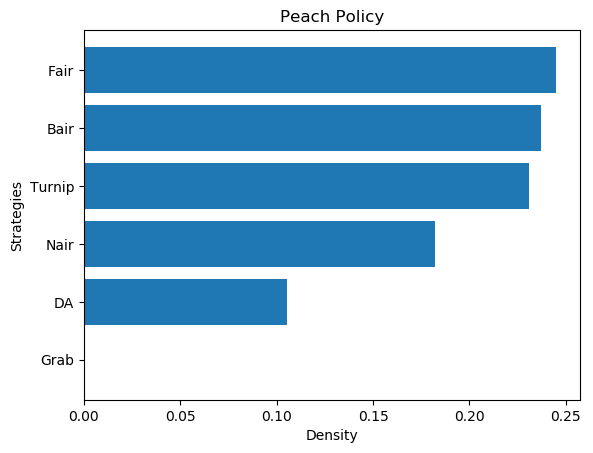

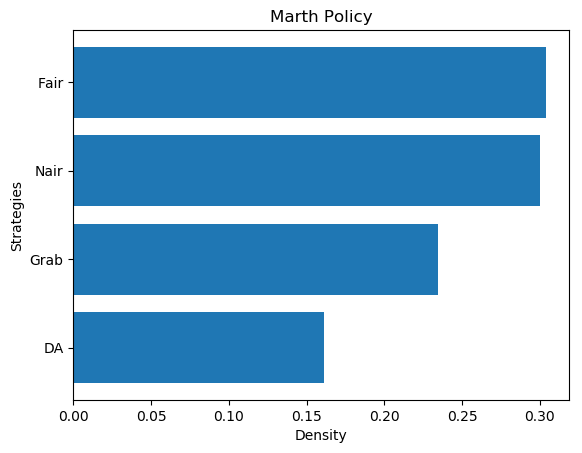

 10%|█         | 10/100 [00:03<00:29,  3.10it/s]

Iteration  10


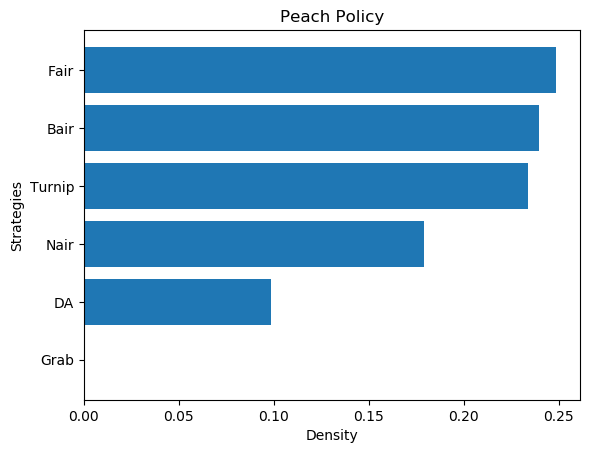

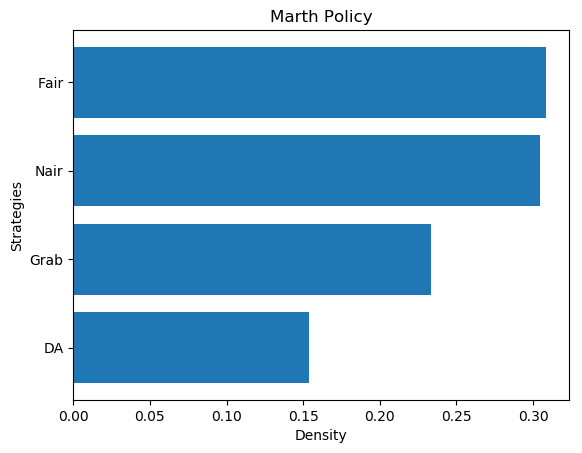

 11%|█         | 11/100 [00:03<00:28,  3.13it/s]

Iteration  11


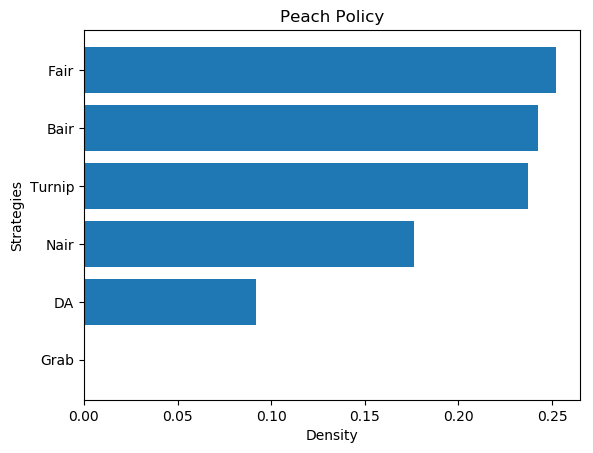

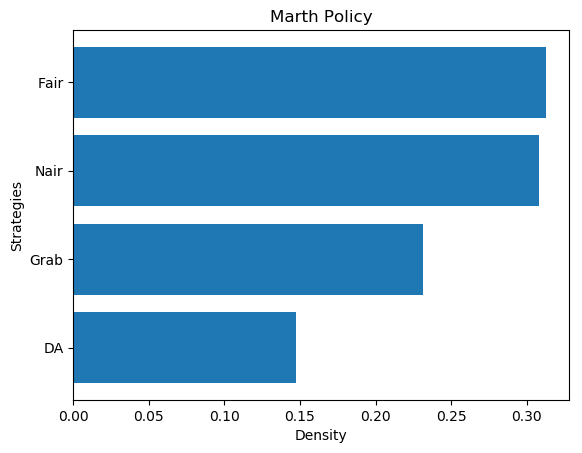

 12%|█▏        | 12/100 [00:03<00:27,  3.16it/s]

Iteration  12


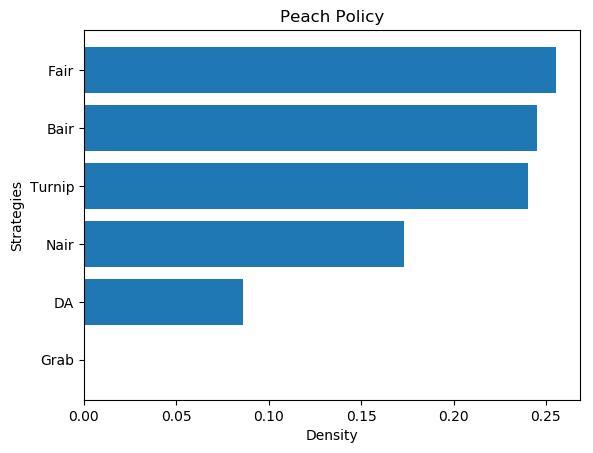

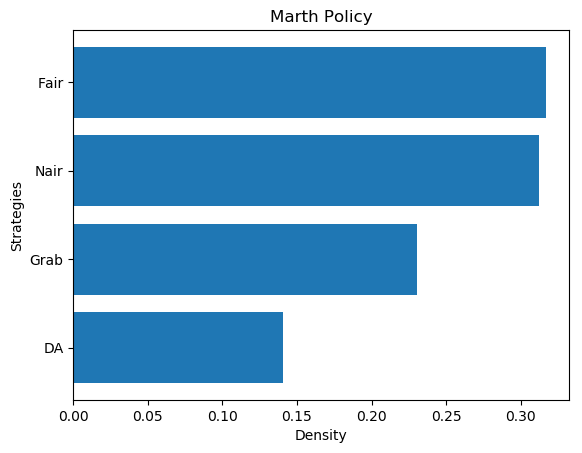

 13%|█▎        | 13/100 [00:04<00:27,  3.20it/s]

Iteration  13


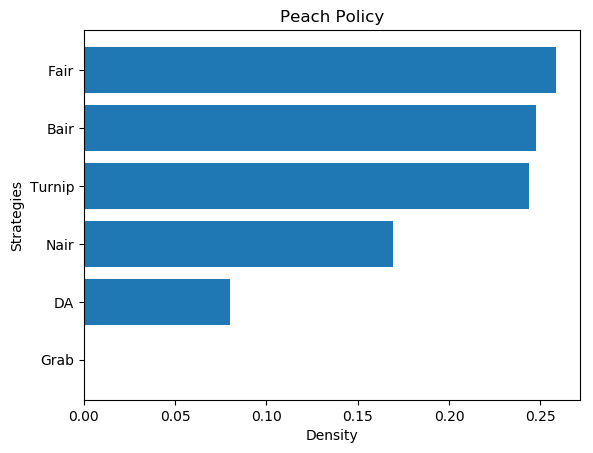

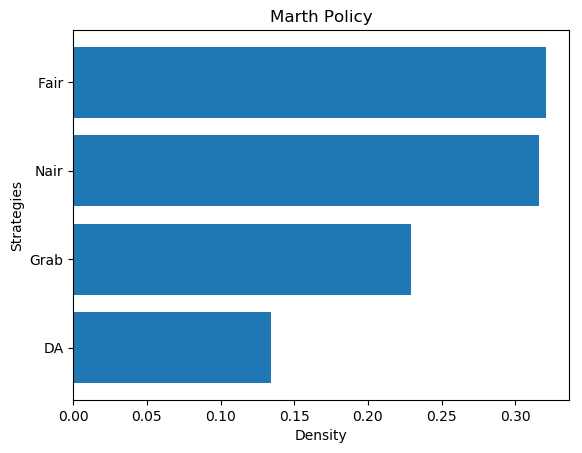

 14%|█▍        | 14/100 [00:04<00:27,  3.08it/s]

Iteration  14


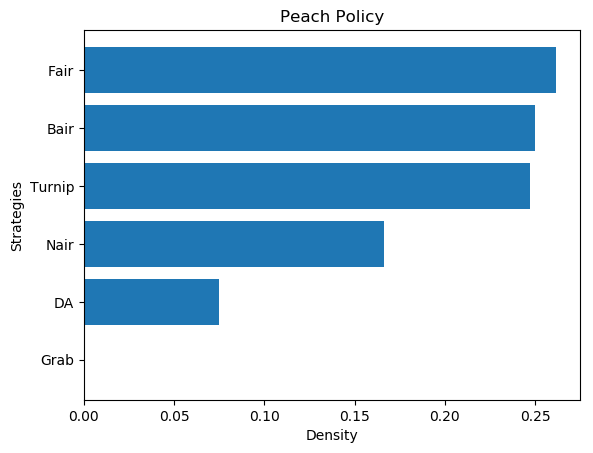

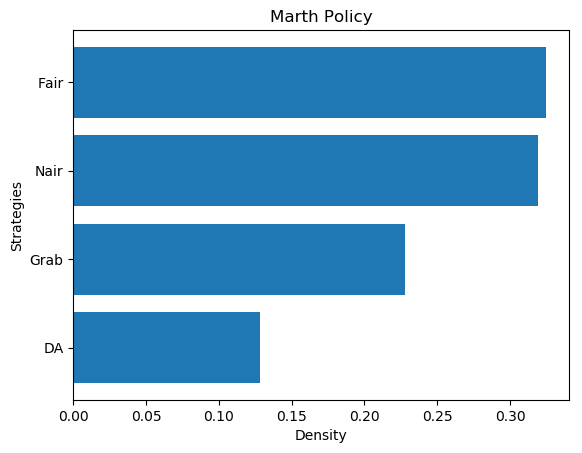

 15%|█▌        | 15/100 [00:04<00:27,  3.12it/s]

Iteration  15


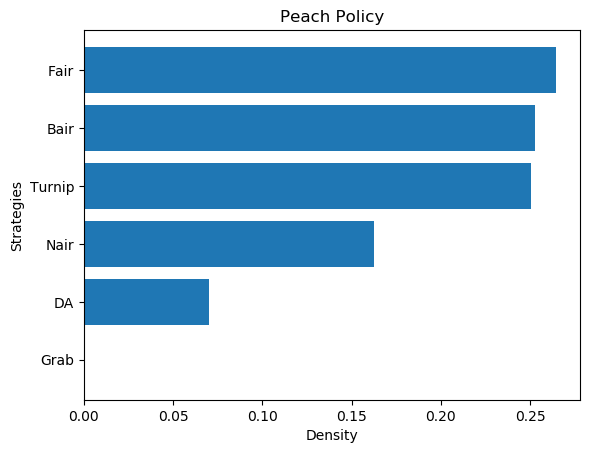

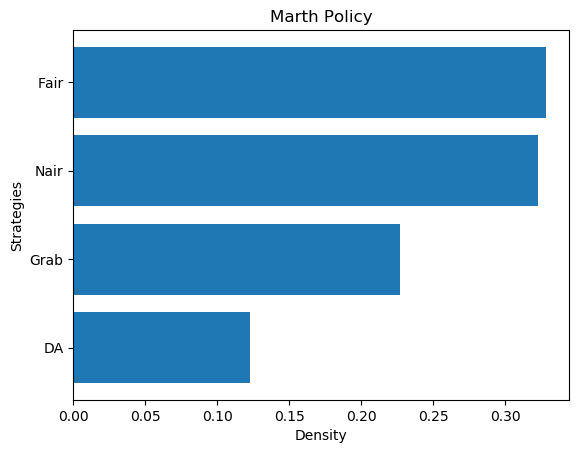

 16%|█▌        | 16/100 [00:05<00:26,  3.15it/s]

Iteration  16


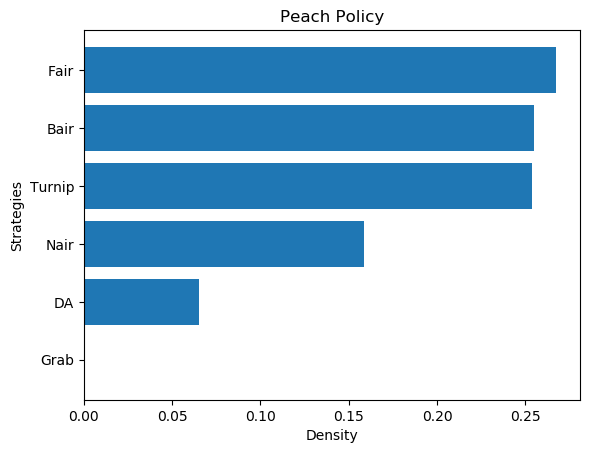

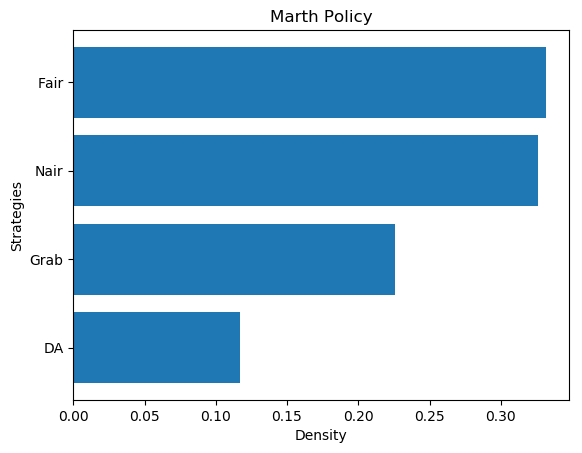

 17%|█▋        | 17/100 [00:05<00:25,  3.20it/s]

Iteration  17


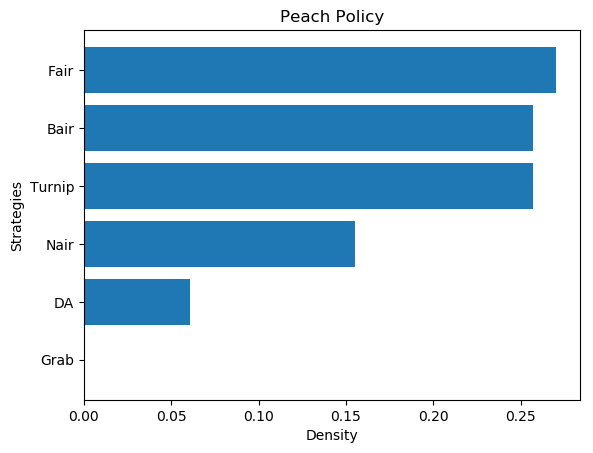

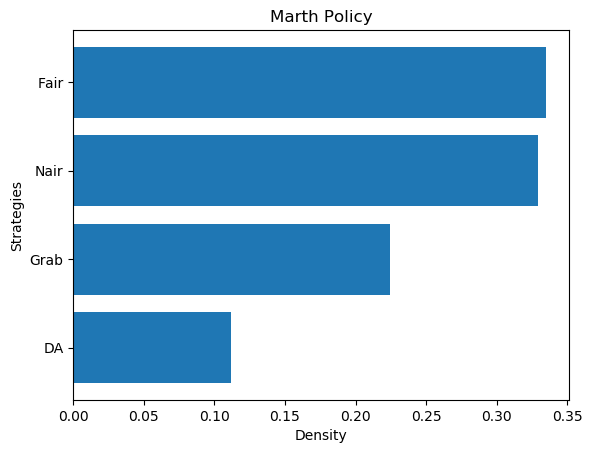

 18%|█▊        | 18/100 [00:05<00:25,  3.21it/s]

Iteration  18


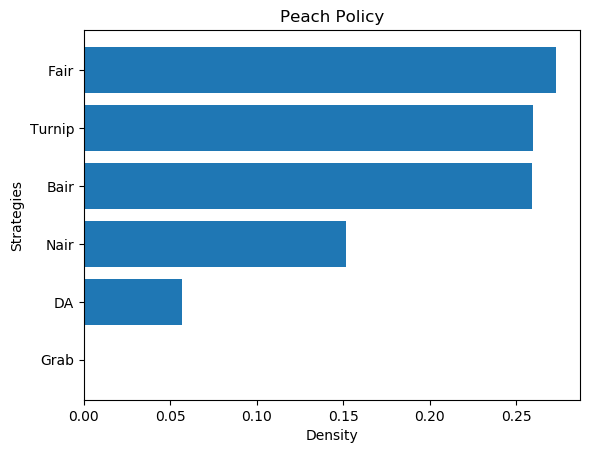

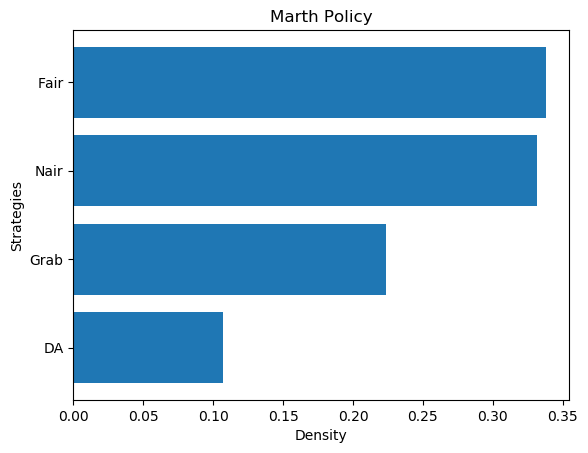

 19%|█▉        | 19/100 [00:06<00:25,  3.23it/s]

Iteration  19


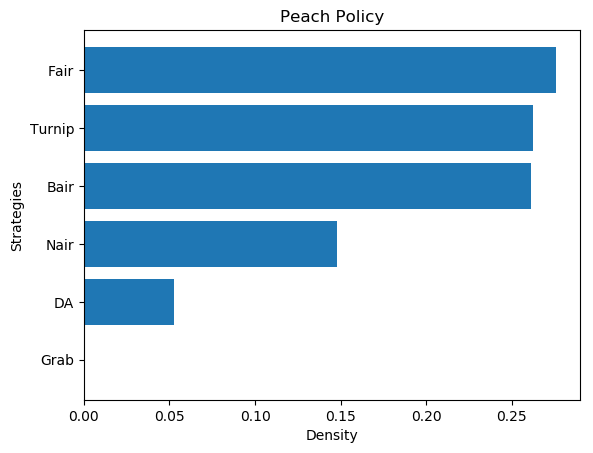

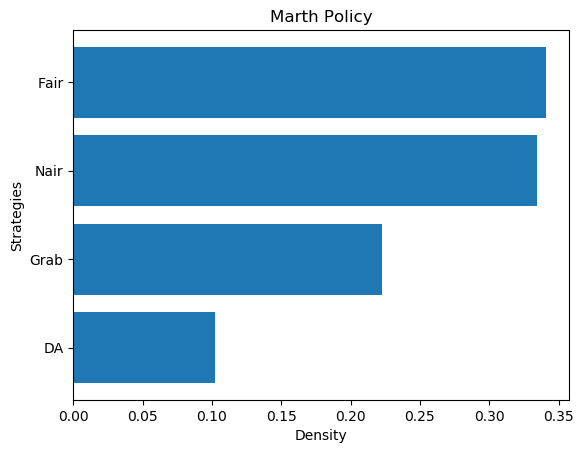

 20%|██        | 20/100 [00:06<00:25,  3.13it/s]

Iteration  20


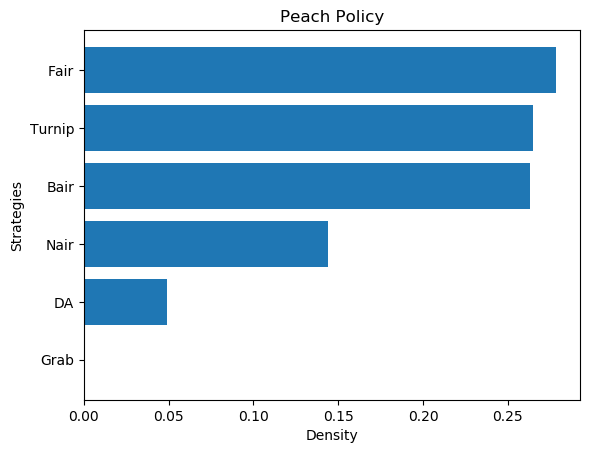

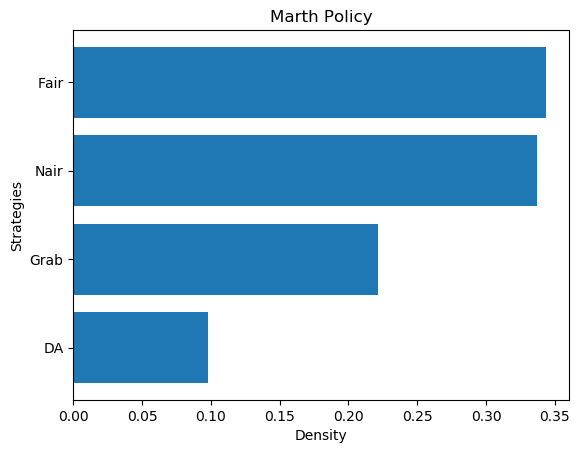

 21%|██        | 21/100 [00:06<00:25,  3.15it/s]

Iteration  21


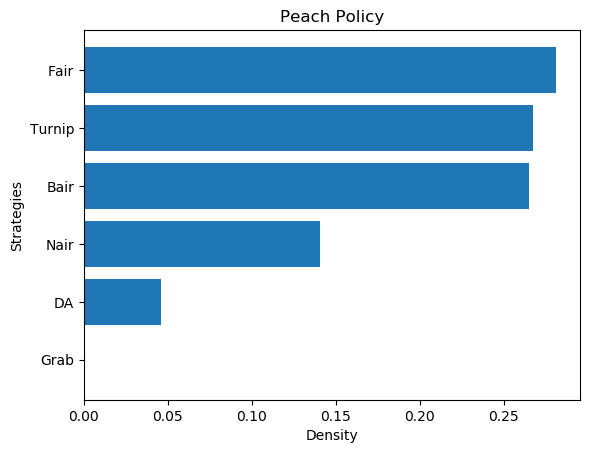

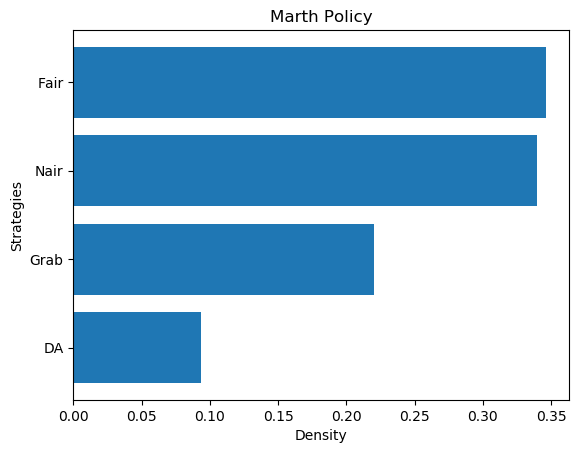

 22%|██▏       | 22/100 [00:07<00:24,  3.16it/s]

Iteration  22


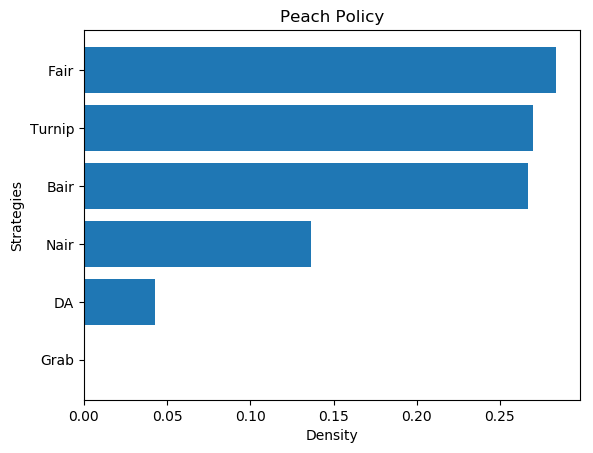

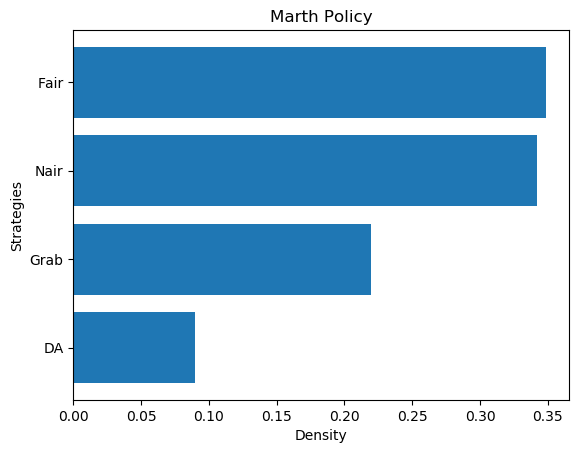

 23%|██▎       | 23/100 [00:07<00:24,  3.12it/s]

Iteration  23


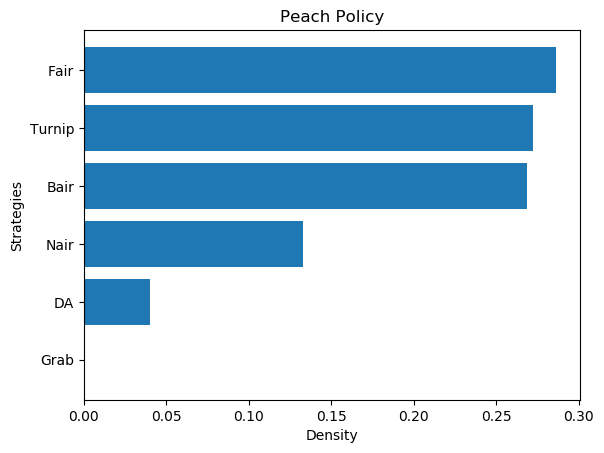

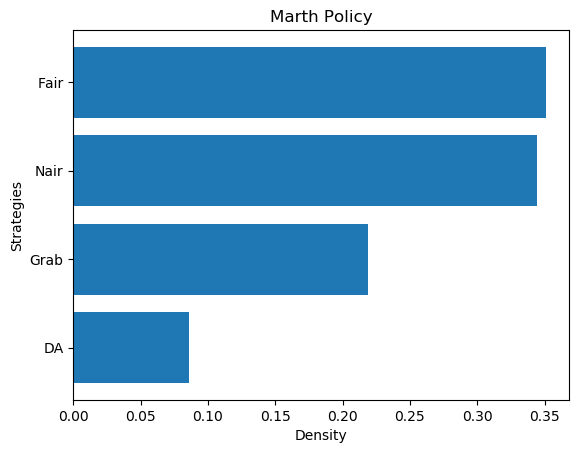

 24%|██▍       | 24/100 [00:07<00:24,  3.09it/s]

Iteration  24


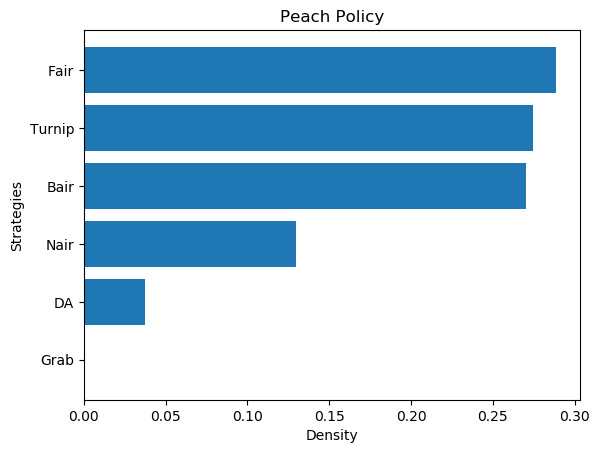

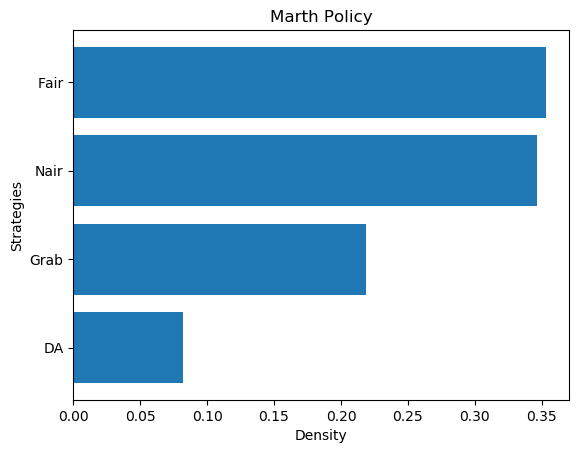

 25%|██▌       | 25/100 [00:08<00:25,  2.91it/s]

Iteration  25


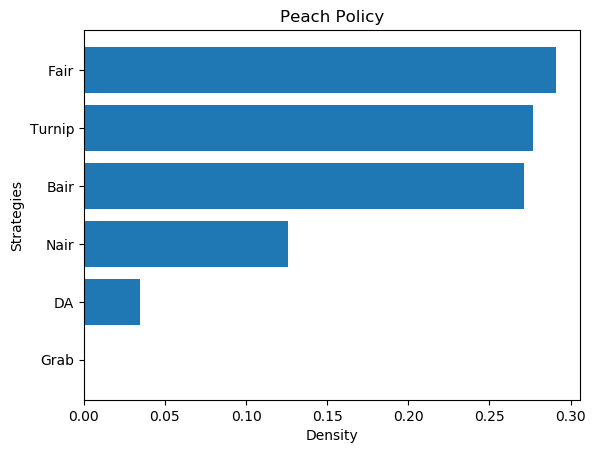

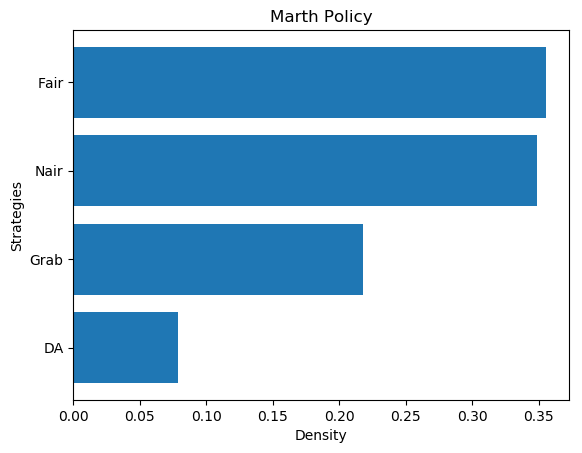

 26%|██▌       | 26/100 [00:08<00:25,  2.95it/s]

Iteration  26


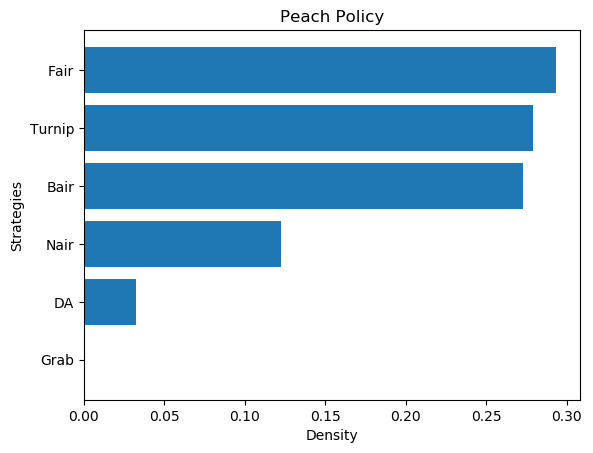

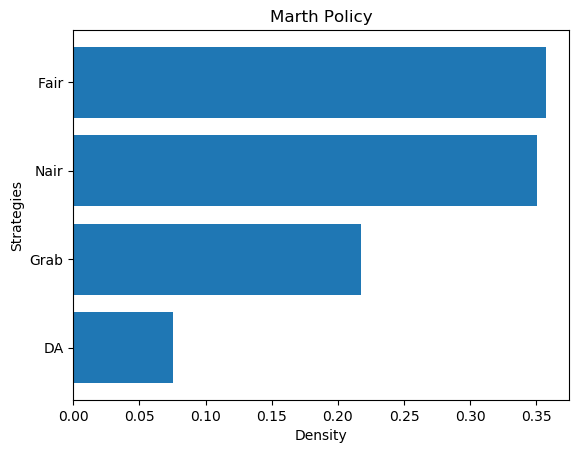

 27%|██▋       | 27/100 [00:08<00:24,  2.95it/s]

Iteration  27


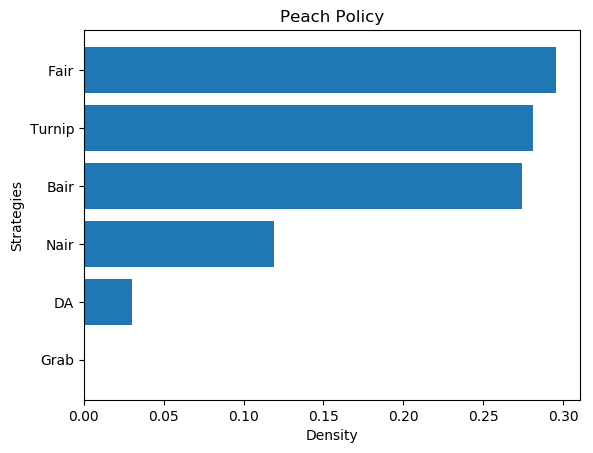

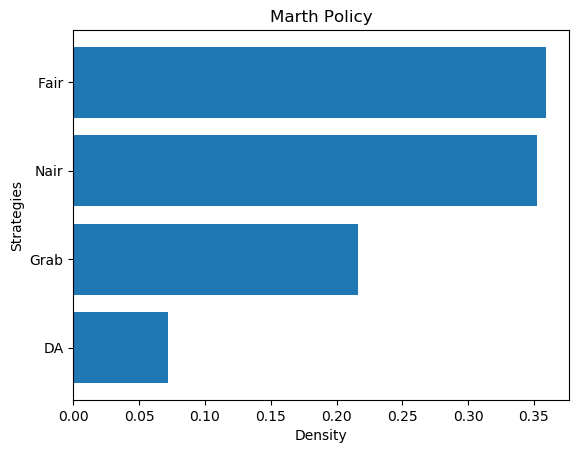

 28%|██▊       | 28/100 [00:09<00:24,  2.96it/s]

Iteration  28


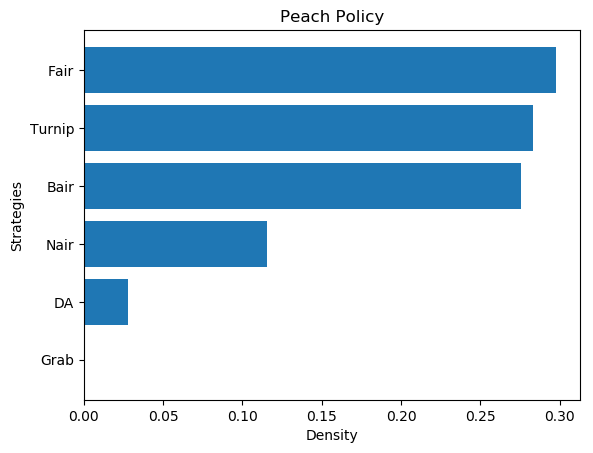

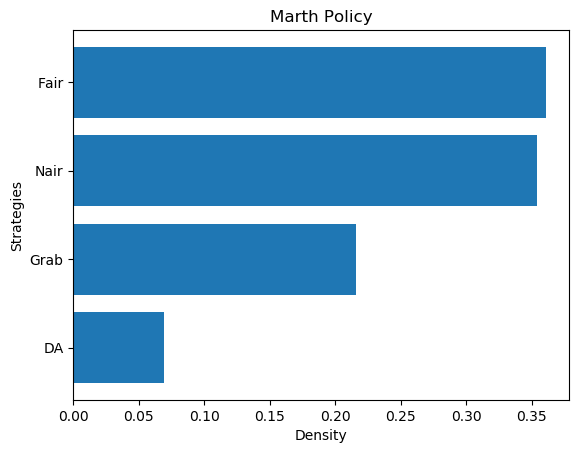

 29%|██▉       | 29/100 [00:09<00:25,  2.77it/s]

Iteration  29


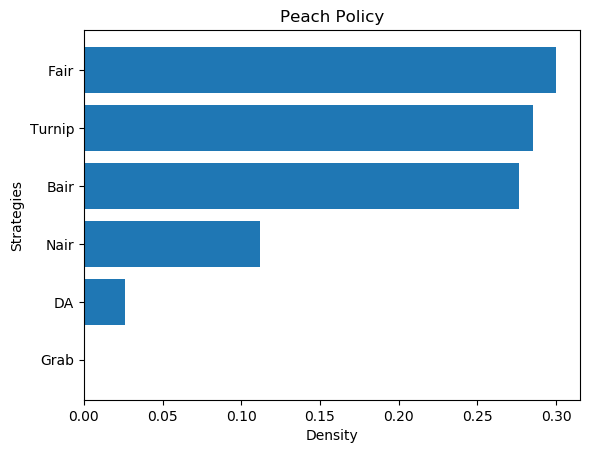

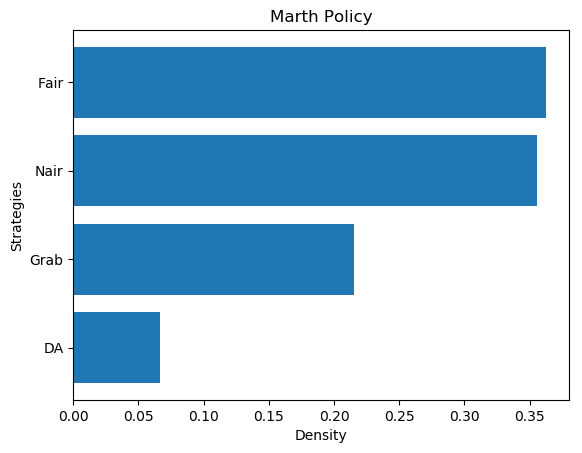

 30%|███       | 30/100 [00:10<00:26,  2.60it/s]

Iteration  30


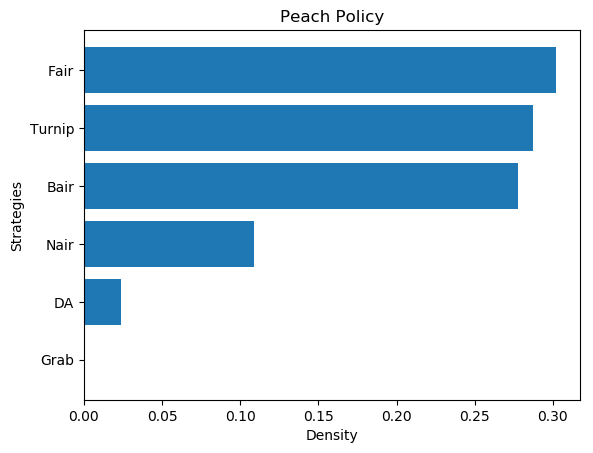

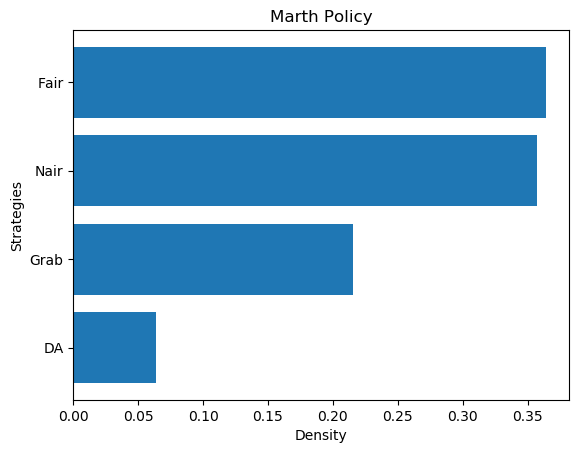

 31%|███       | 31/100 [00:10<00:28,  2.44it/s]

Iteration  31


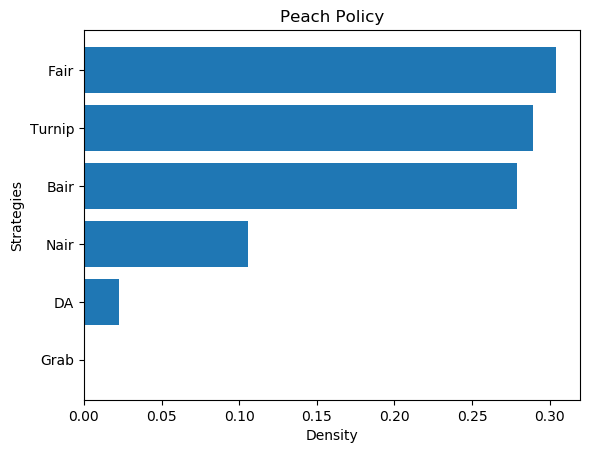

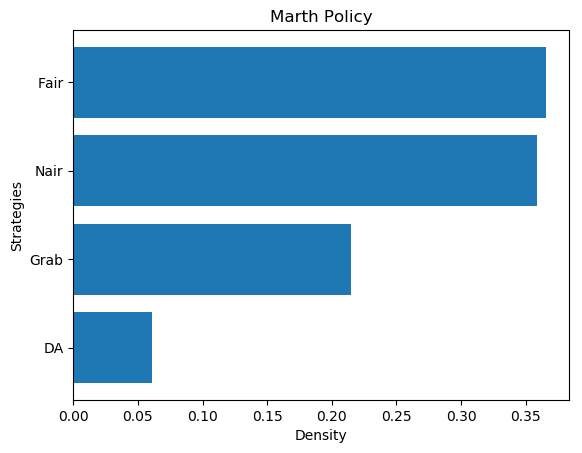

 32%|███▏      | 32/100 [00:10<00:27,  2.44it/s]

Iteration  32


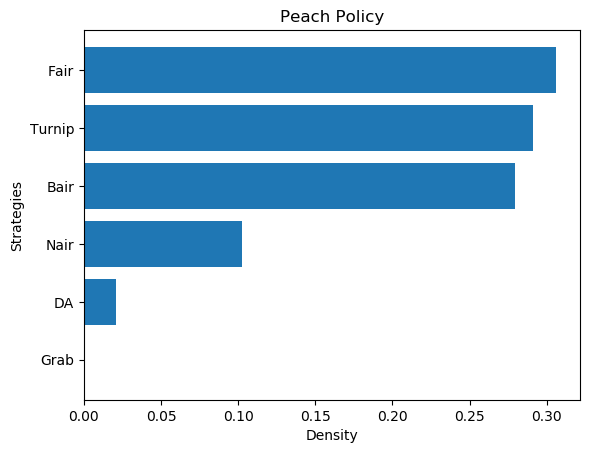

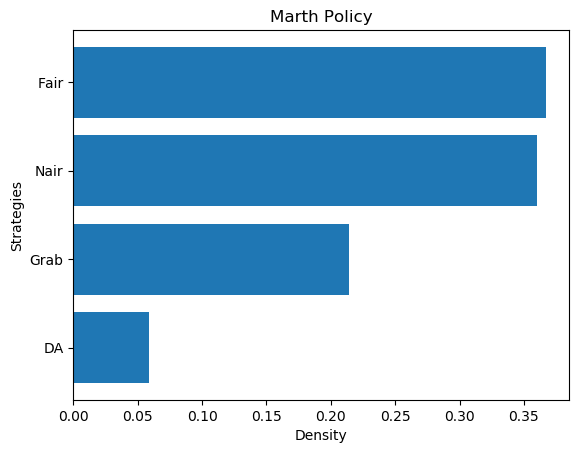

 33%|███▎      | 33/100 [00:11<00:26,  2.56it/s]

Iteration  33


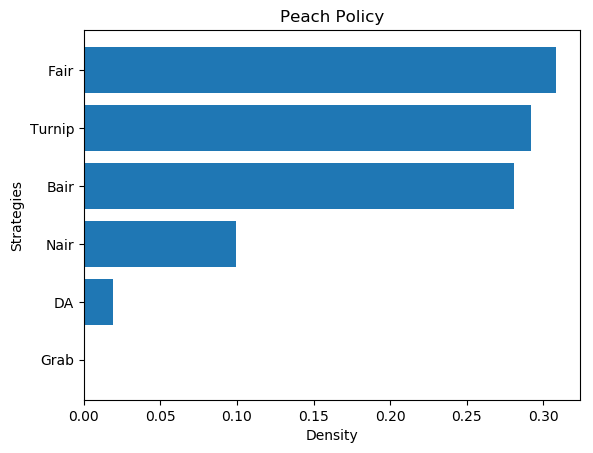

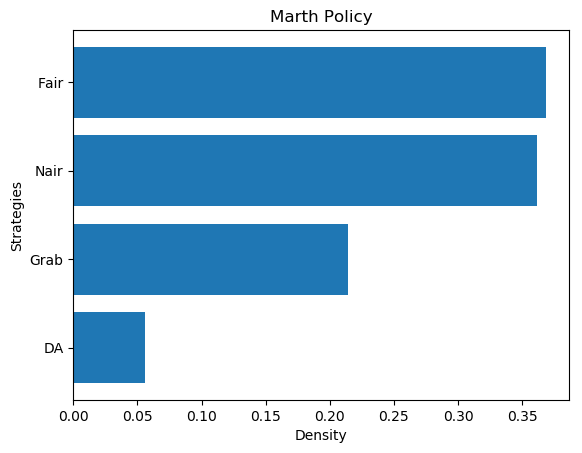

 34%|███▍      | 34/100 [00:11<00:25,  2.56it/s]

Iteration  34


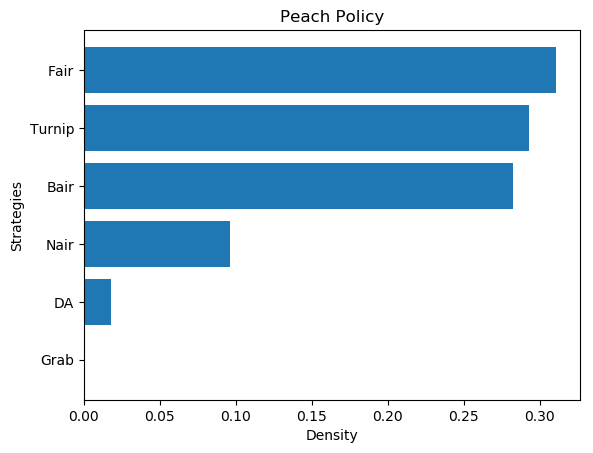

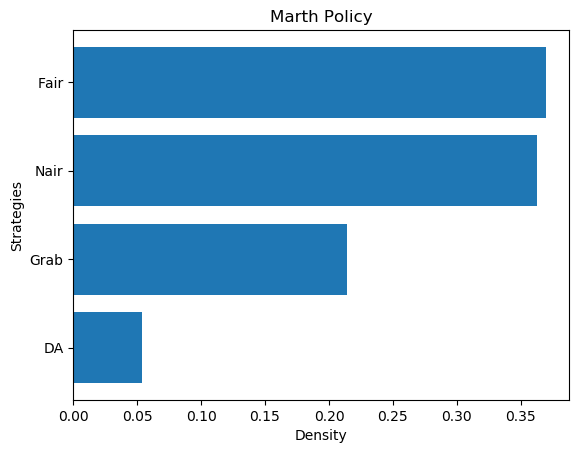

 35%|███▌      | 35/100 [00:12<00:24,  2.62it/s]

Iteration  35


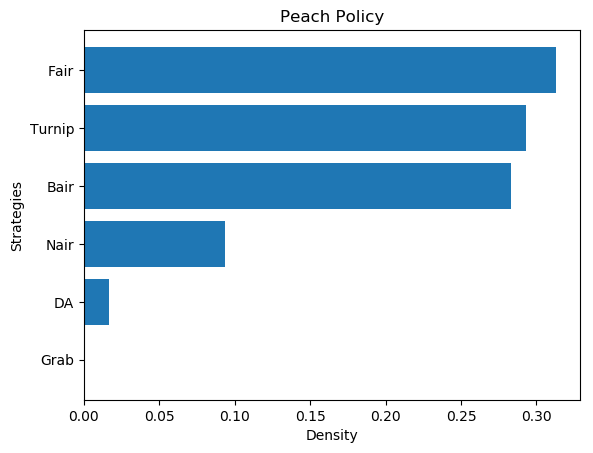

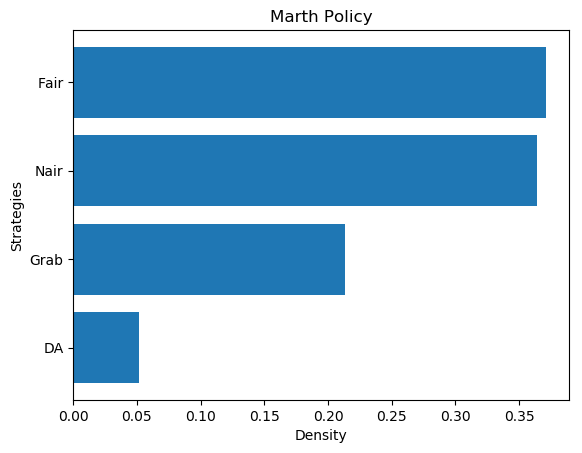

 36%|███▌      | 36/100 [00:12<00:25,  2.50it/s]

Iteration  36


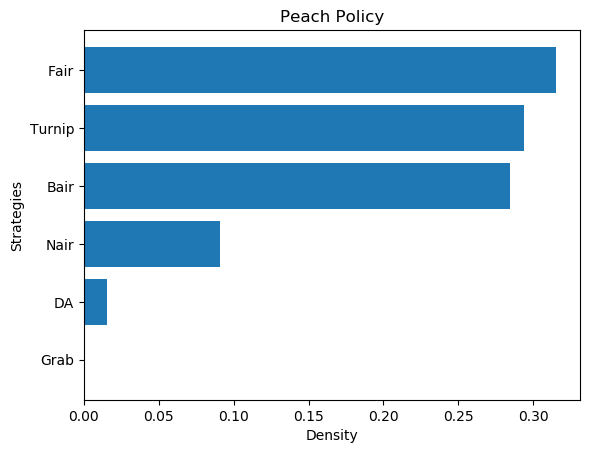

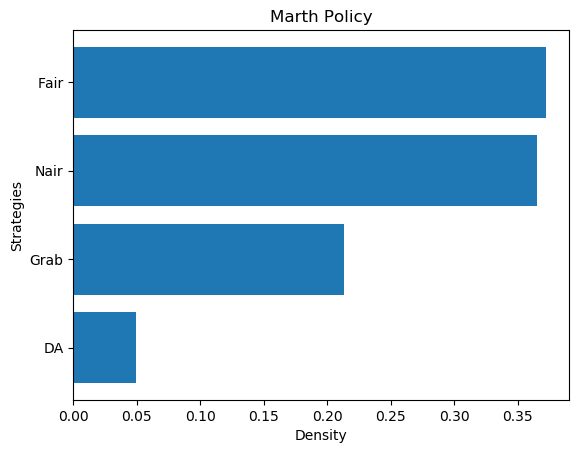

 37%|███▋      | 37/100 [00:12<00:24,  2.55it/s]

Iteration  37


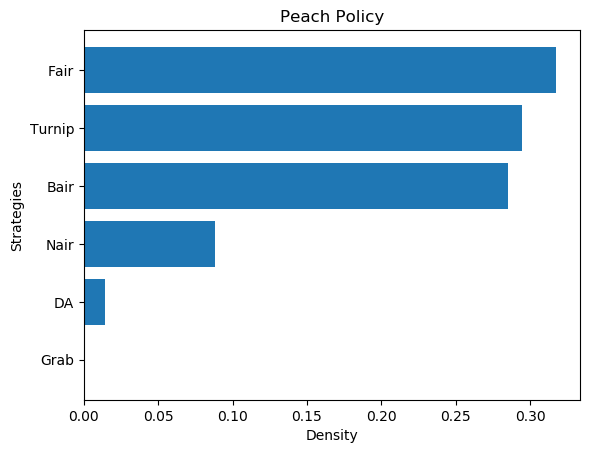

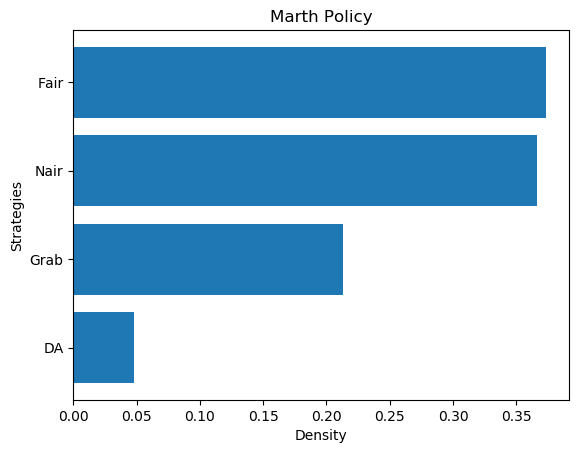

 38%|███▊      | 38/100 [00:13<00:23,  2.59it/s]

Iteration  38


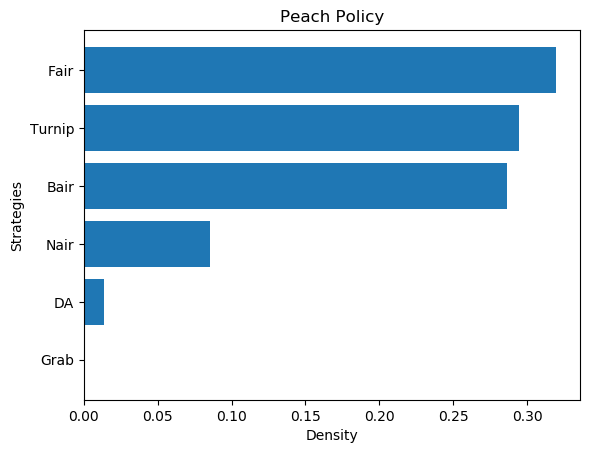

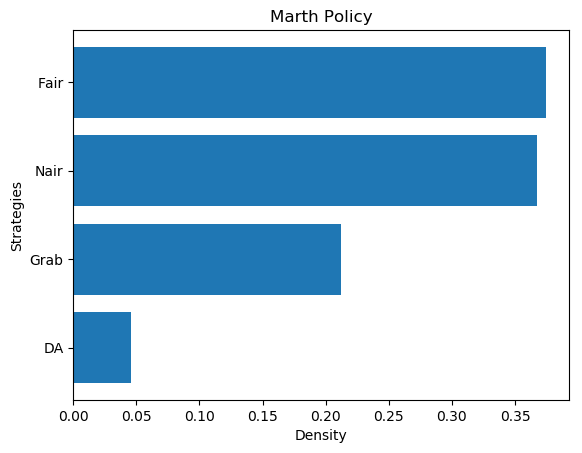

 39%|███▉      | 39/100 [00:13<00:22,  2.77it/s]

Iteration  39


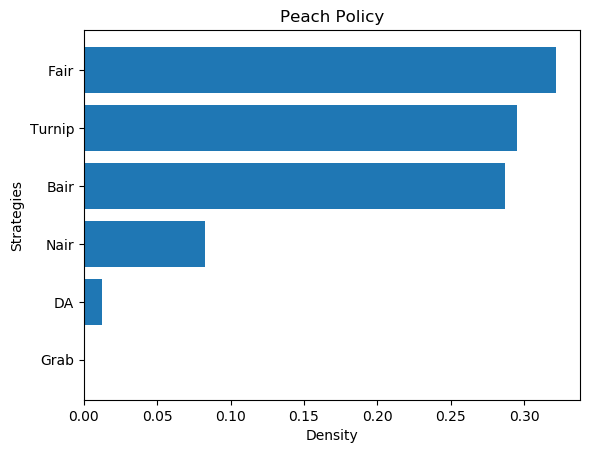

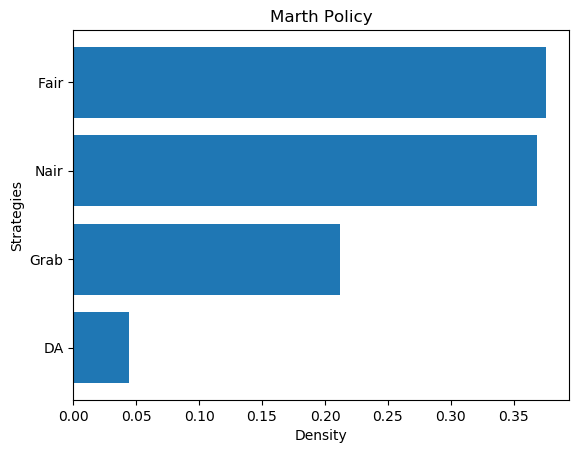

 40%|████      | 40/100 [00:13<00:21,  2.81it/s]

Iteration  40


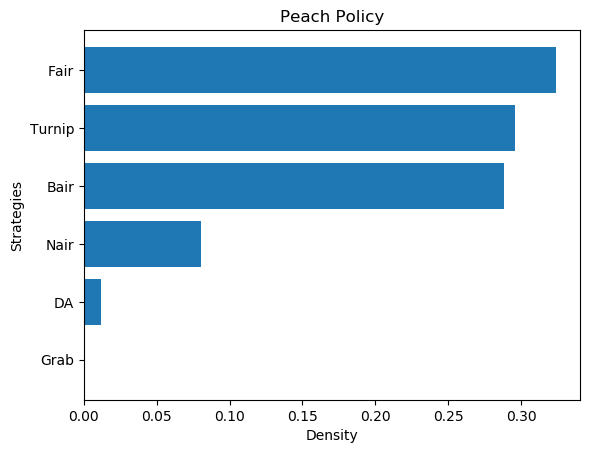

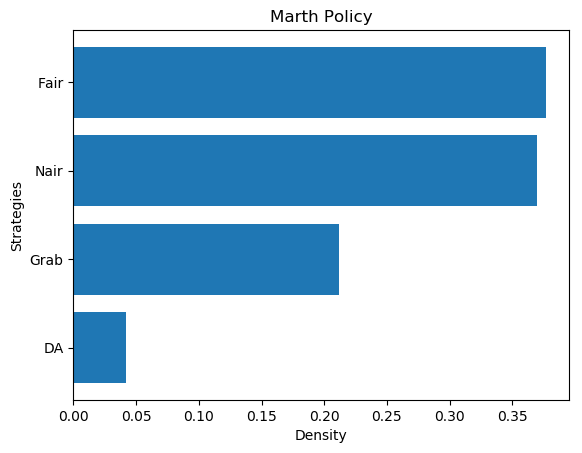

 41%|████      | 41/100 [00:14<00:23,  2.53it/s]

Iteration  41


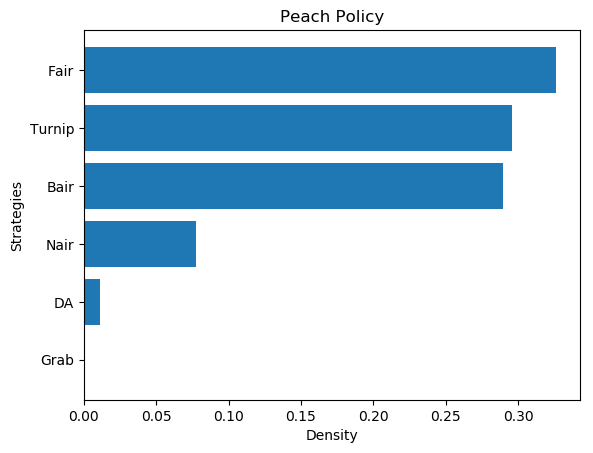

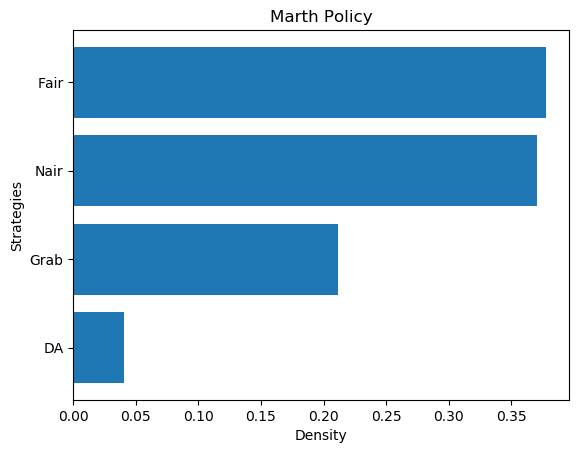

 42%|████▏     | 42/100 [00:14<00:23,  2.43it/s]

Iteration  42


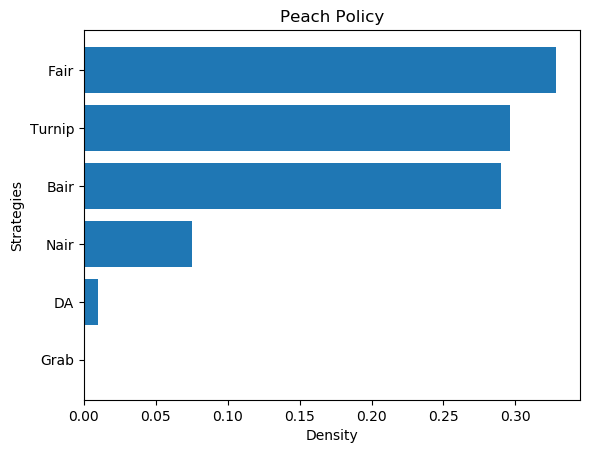

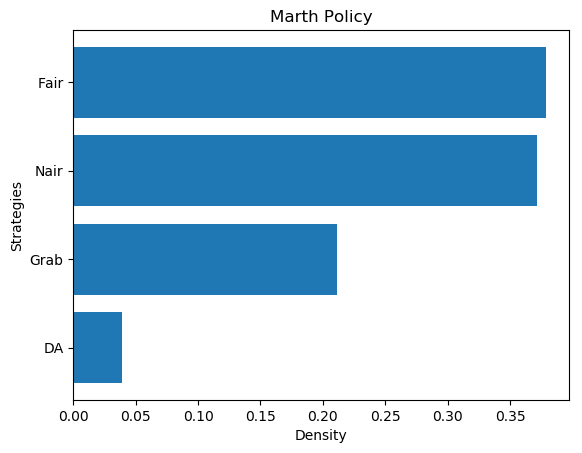

 43%|████▎     | 43/100 [00:15<00:22,  2.52it/s]

Iteration  43


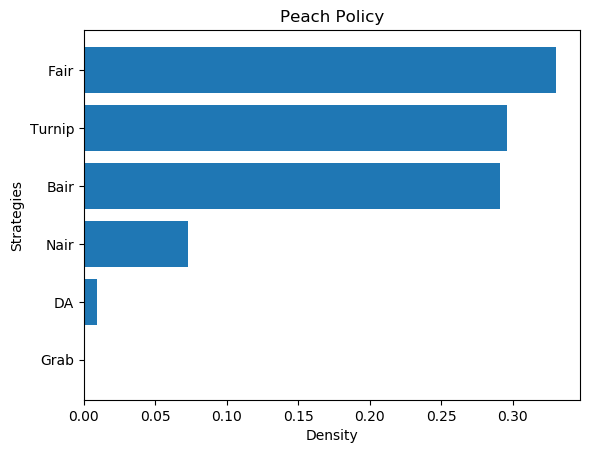

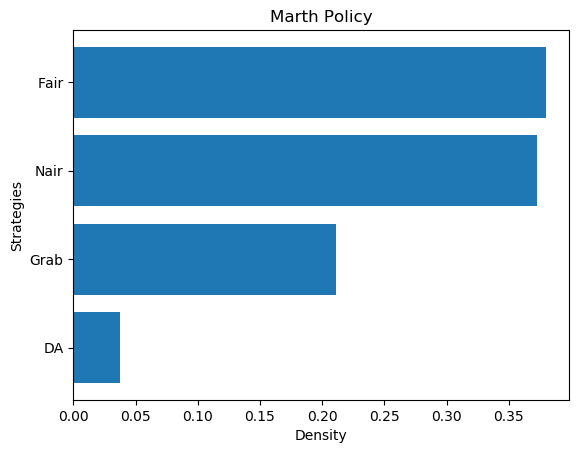

 44%|████▍     | 44/100 [00:15<00:20,  2.72it/s]

Iteration  44


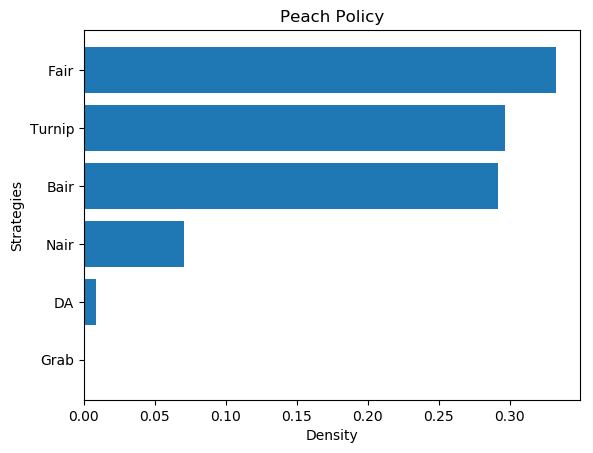

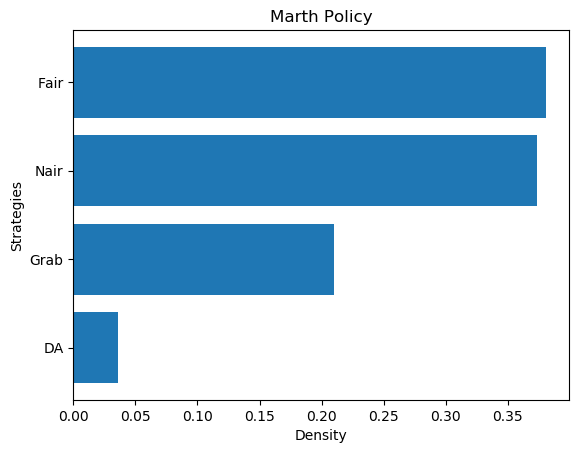

 45%|████▌     | 45/100 [00:15<00:21,  2.58it/s]

Iteration  45


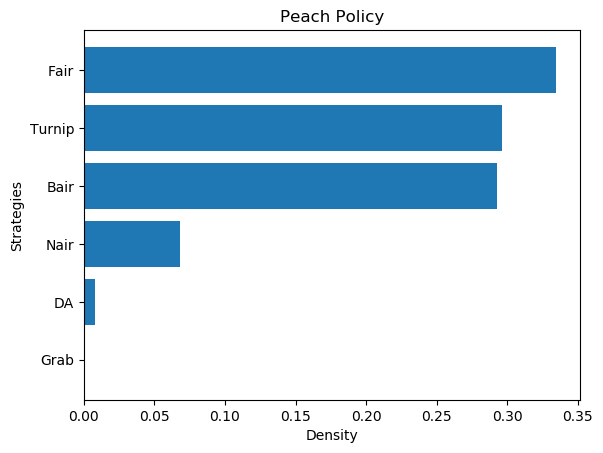

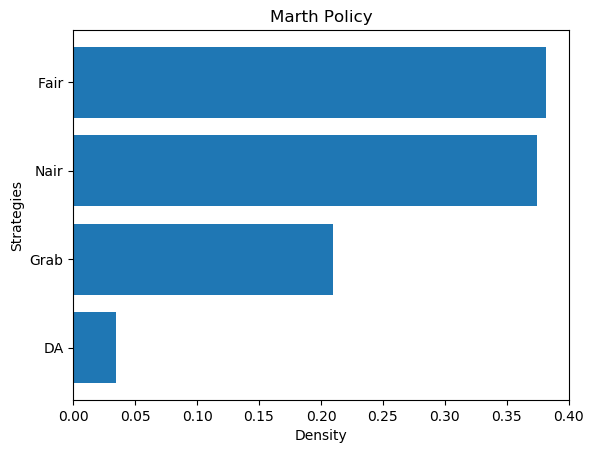

 46%|████▌     | 46/100 [00:16<00:20,  2.70it/s]

Iteration  46


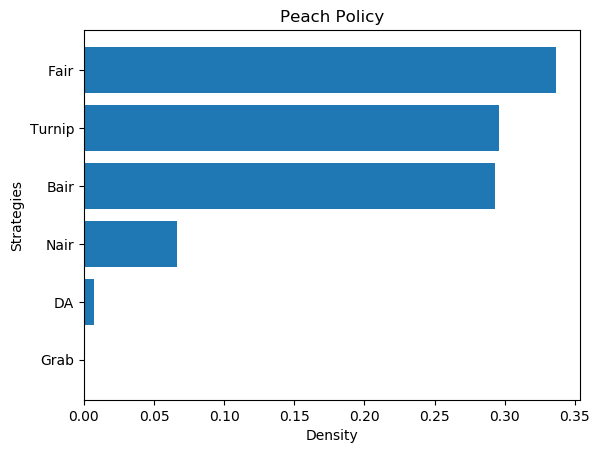

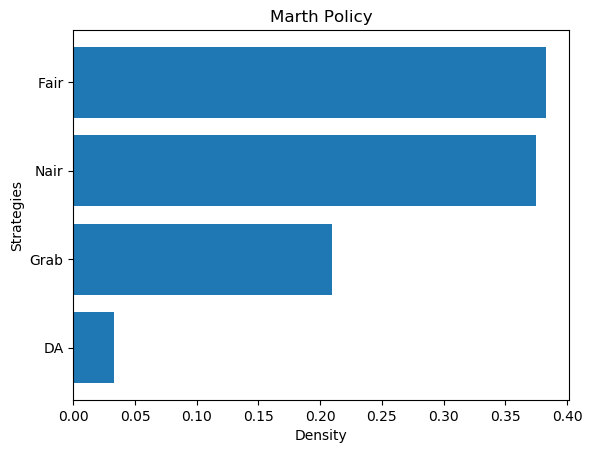

 47%|████▋     | 47/100 [00:16<00:20,  2.53it/s]

Iteration  47


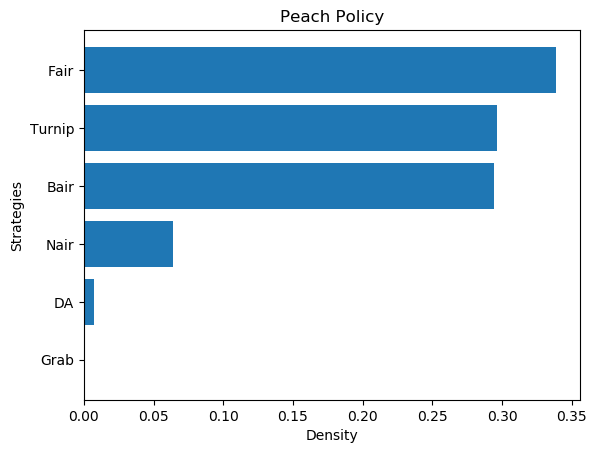

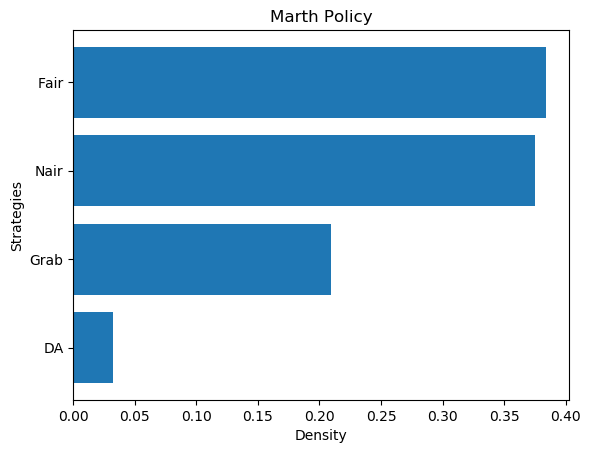

 48%|████▊     | 48/100 [00:17<00:20,  2.50it/s]

Iteration  48


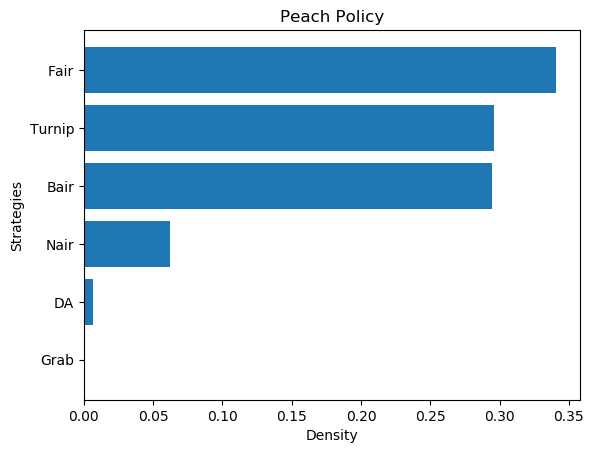

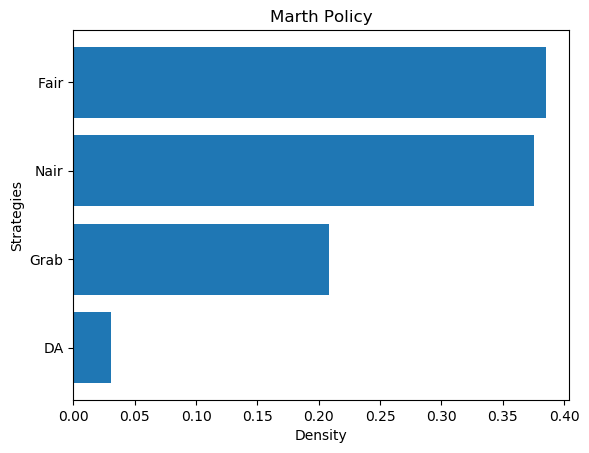

 49%|████▉     | 49/100 [00:17<00:19,  2.58it/s]

Iteration  49


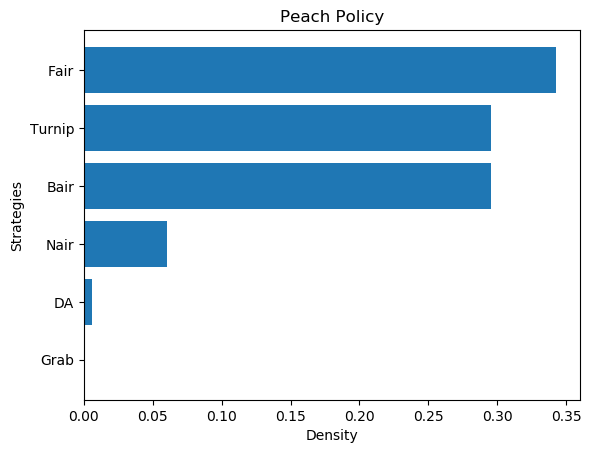

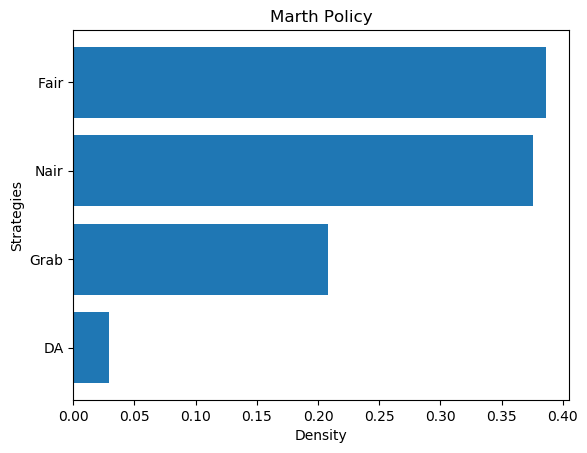

 50%|█████     | 50/100 [00:17<00:19,  2.55it/s]

Iteration  50


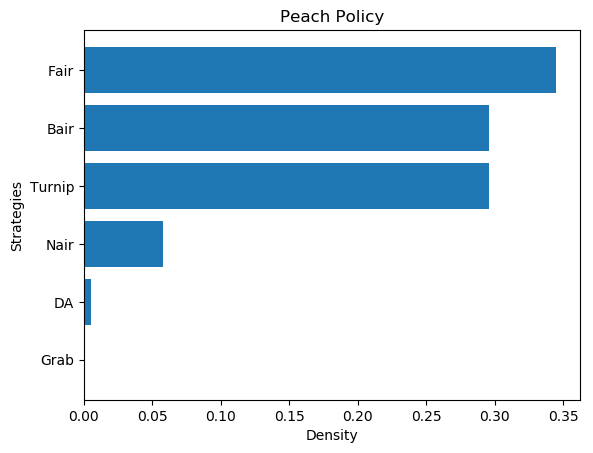

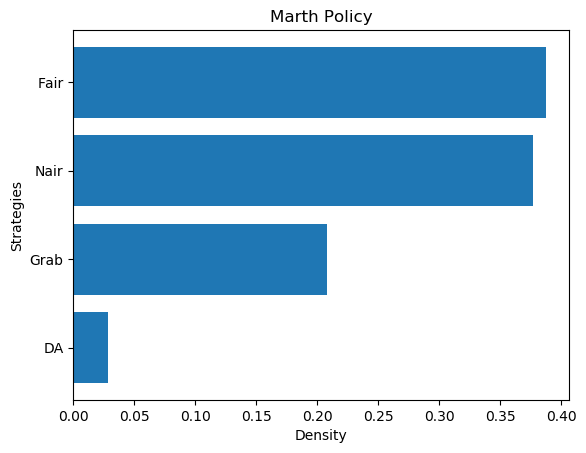

 51%|█████     | 51/100 [00:18<00:19,  2.47it/s]

Iteration  51


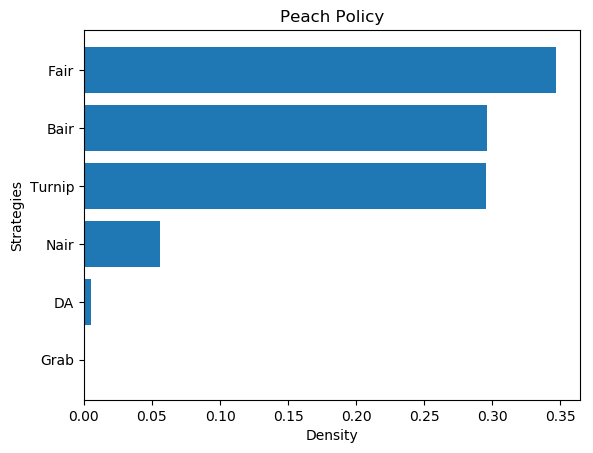

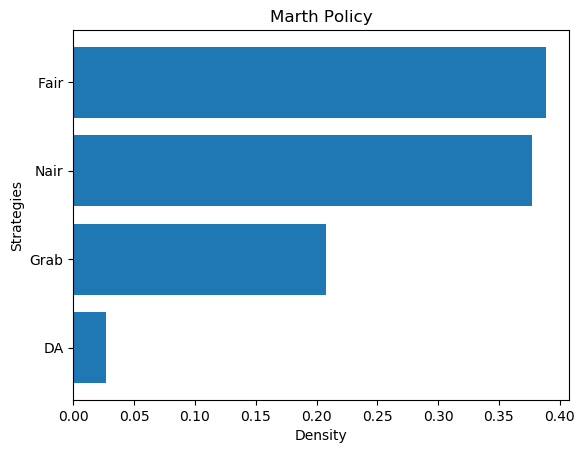

 52%|█████▏    | 52/100 [00:18<00:19,  2.49it/s]

Iteration  52


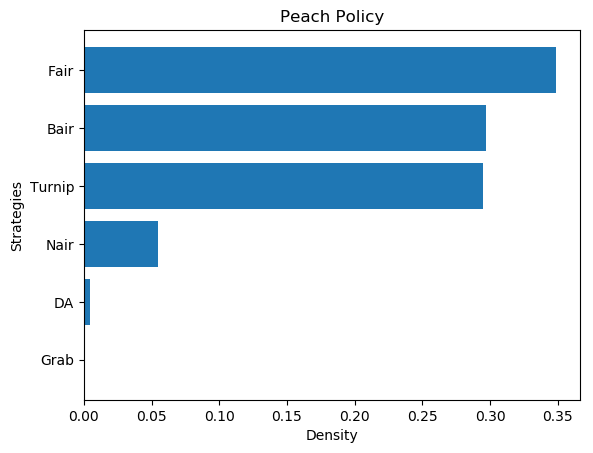

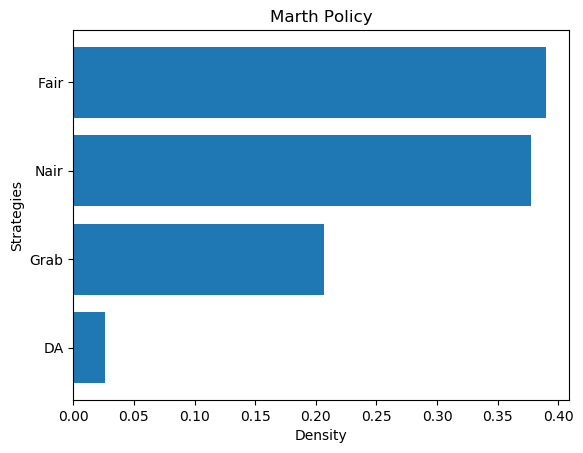

 53%|█████▎    | 53/100 [00:19<00:19,  2.44it/s]

Iteration  53


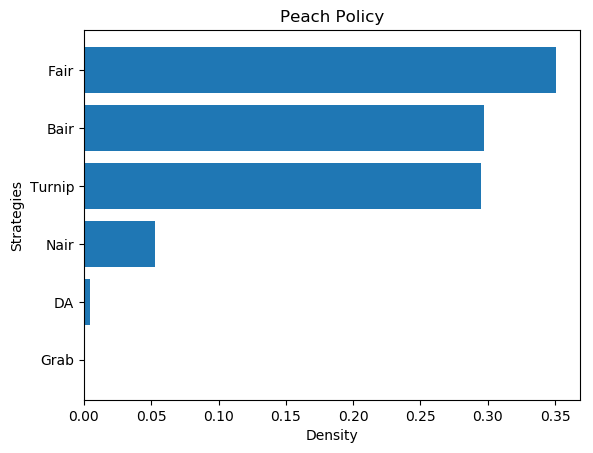

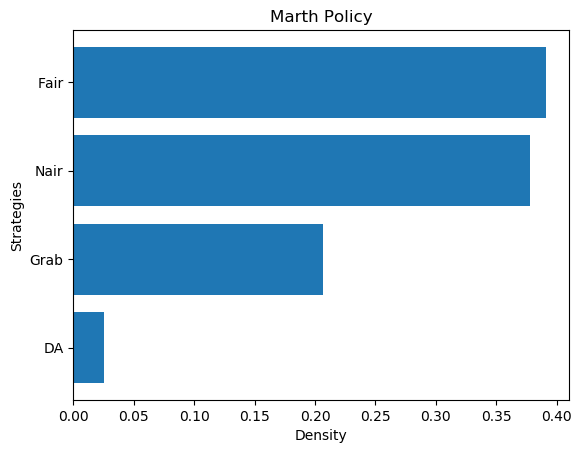

 54%|█████▍    | 54/100 [00:19<00:17,  2.64it/s]

Iteration  54


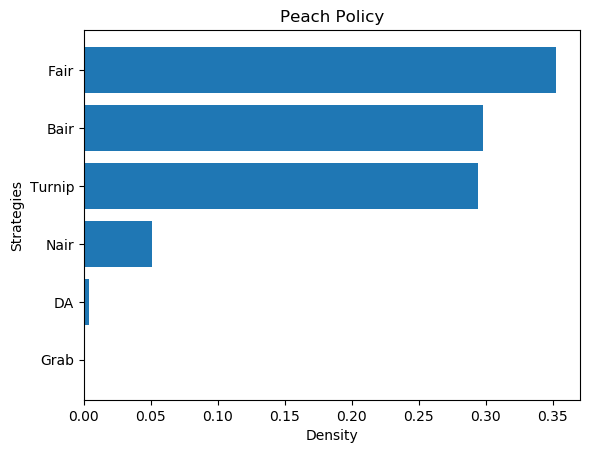

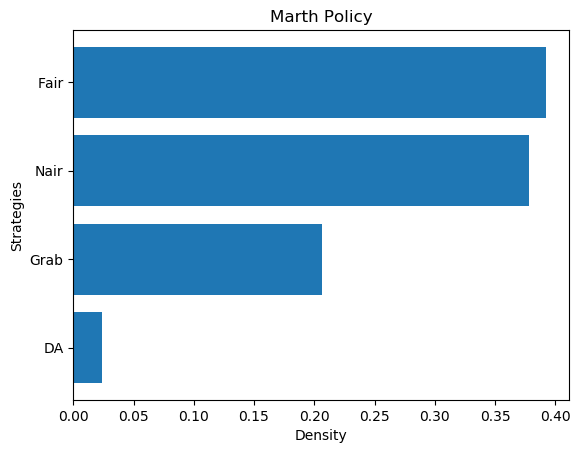

 55%|█████▌    | 55/100 [00:19<00:16,  2.80it/s]

Iteration  55


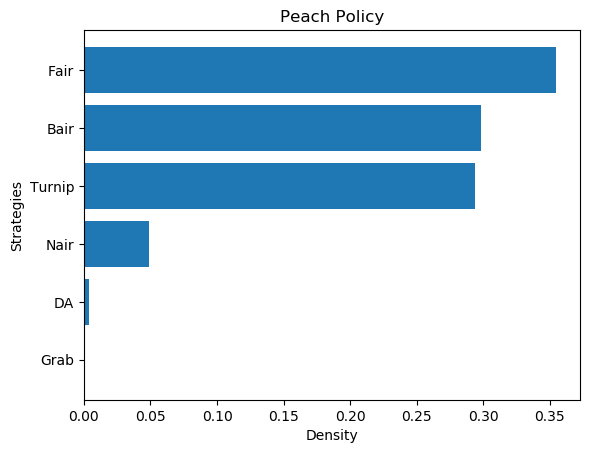

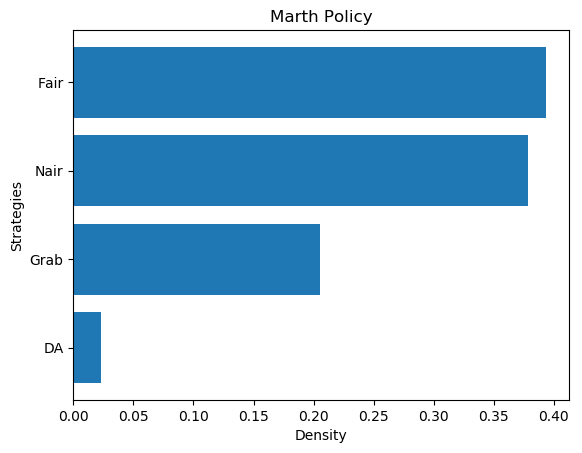

 56%|█████▌    | 56/100 [00:20<00:16,  2.67it/s]

Iteration  56


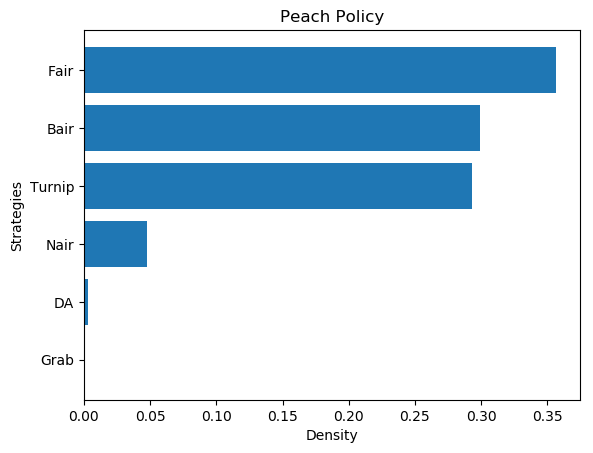

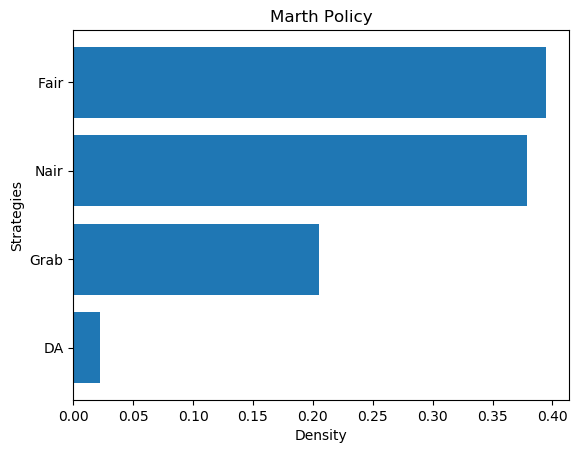

 57%|█████▋    | 57/100 [00:20<00:15,  2.74it/s]

Iteration  57


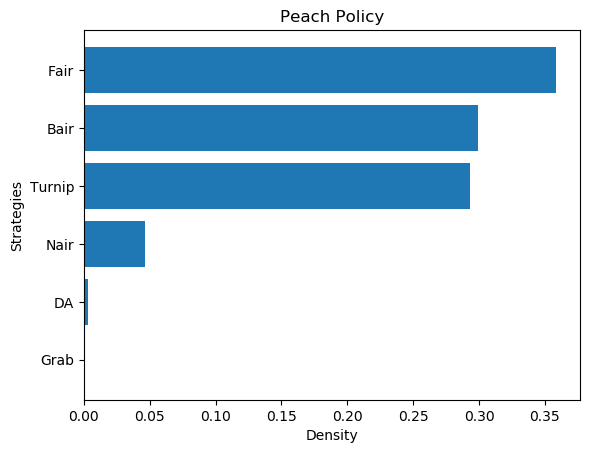

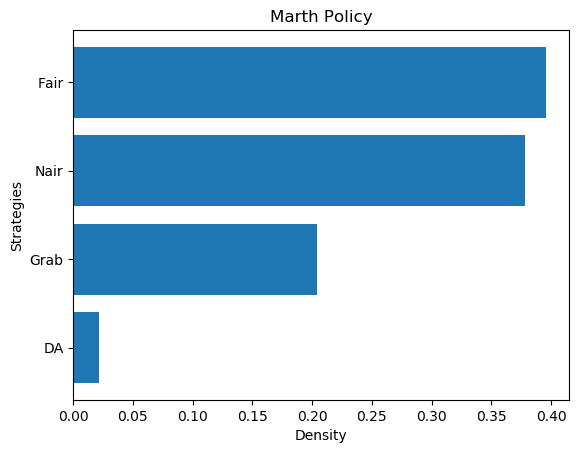

 58%|█████▊    | 58/100 [00:20<00:15,  2.66it/s]

Iteration  58


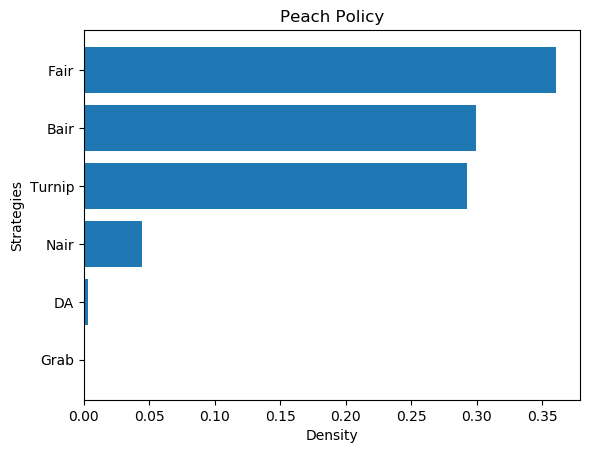

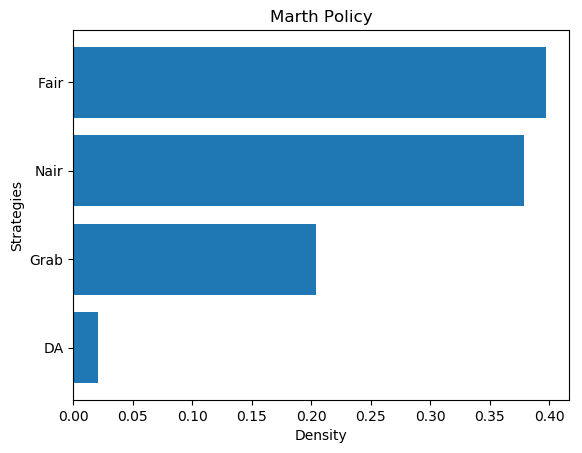

 59%|█████▉    | 59/100 [00:21<00:15,  2.59it/s]

Iteration  59


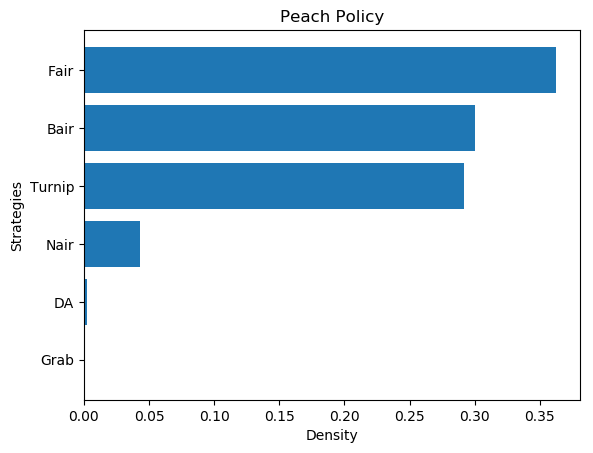

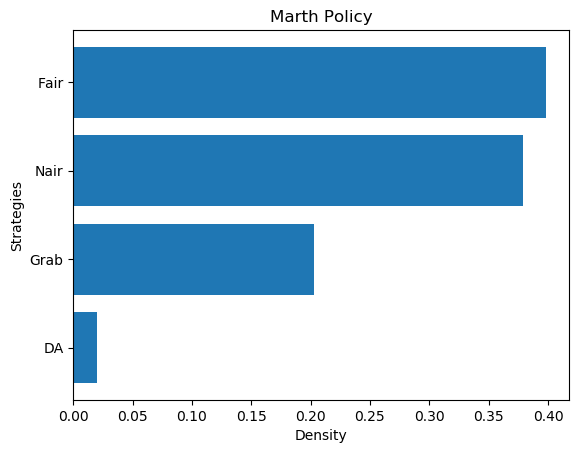

 60%|██████    | 60/100 [00:21<00:15,  2.60it/s]

Iteration  60


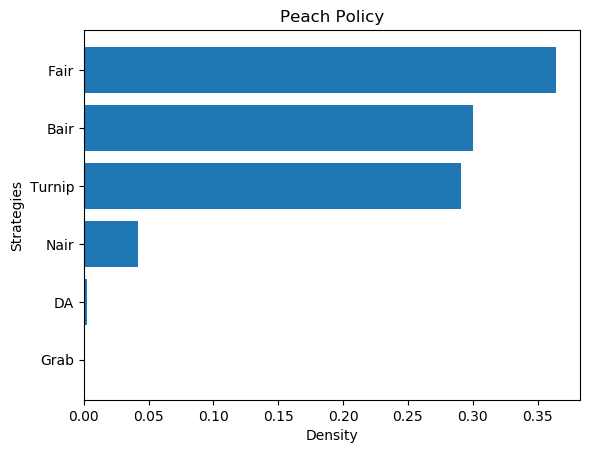

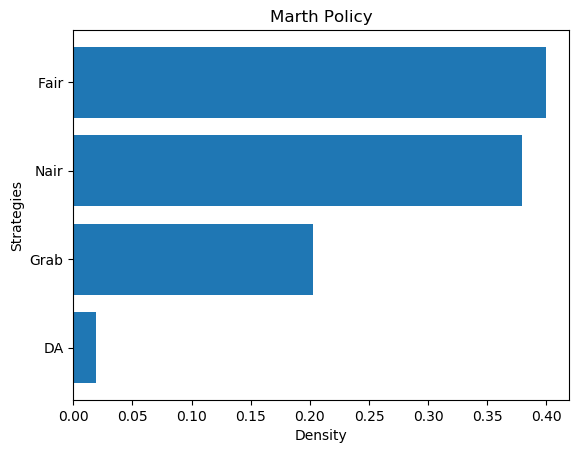

 61%|██████    | 61/100 [00:22<00:15,  2.57it/s]

Iteration  61


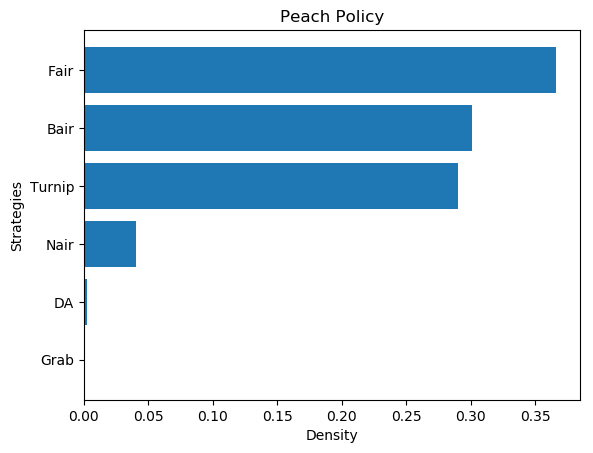

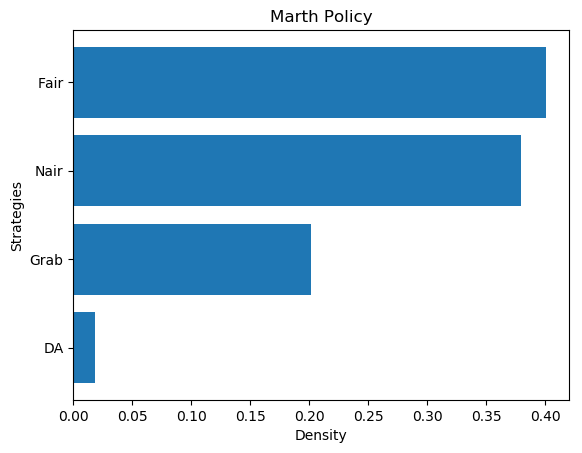

 62%|██████▏   | 62/100 [00:22<00:14,  2.56it/s]

Iteration  62


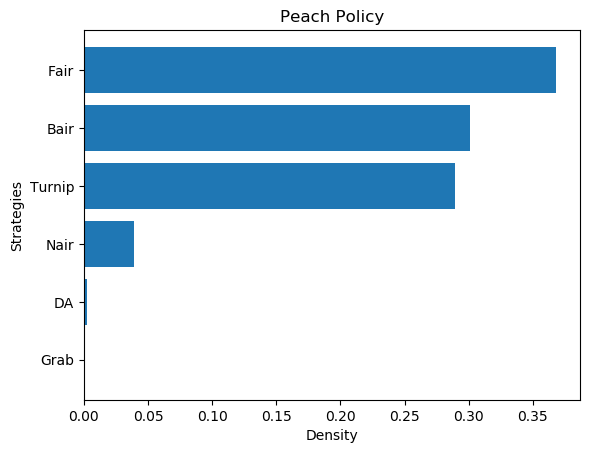

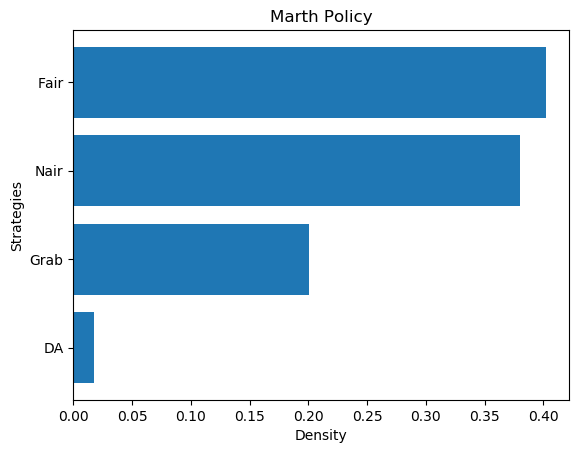

 63%|██████▎   | 63/100 [00:22<00:14,  2.49it/s]

Iteration  63


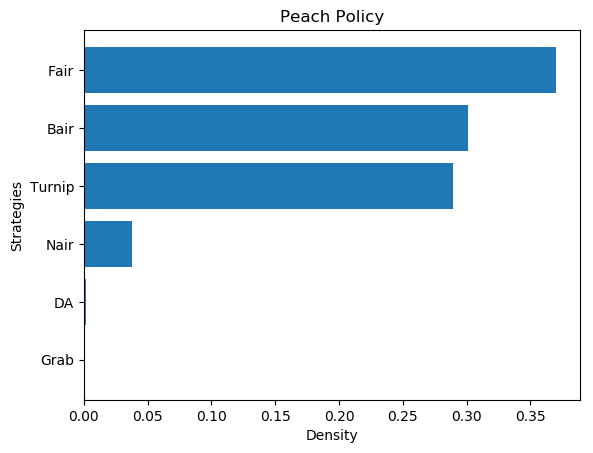

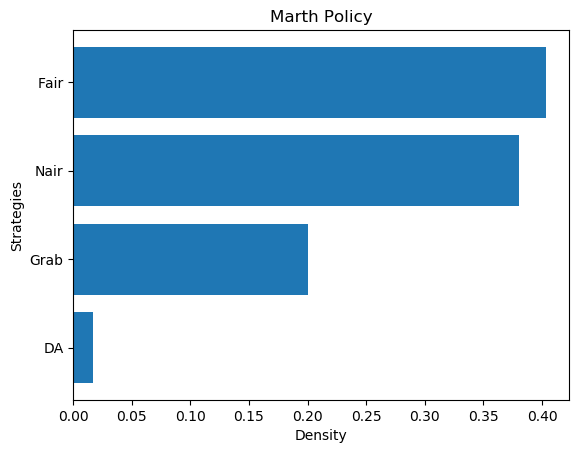

 64%|██████▍   | 64/100 [00:23<00:15,  2.36it/s]

Iteration  64


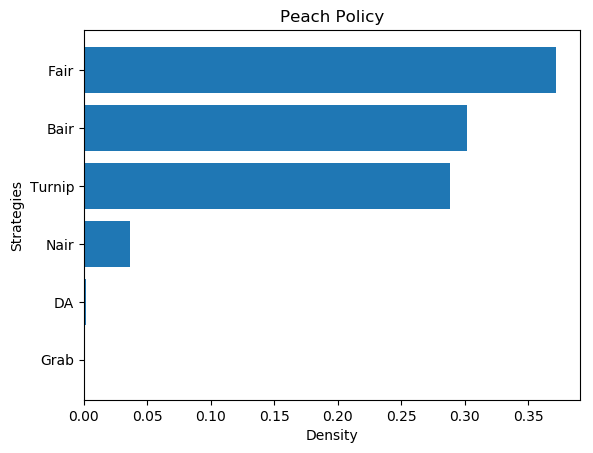

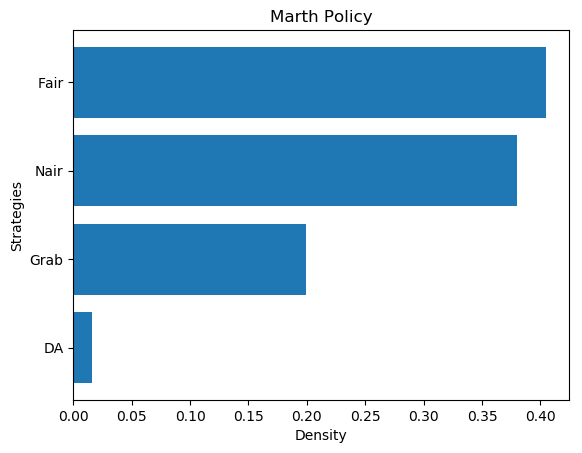

 65%|██████▌   | 65/100 [00:23<00:14,  2.37it/s]

Iteration  65


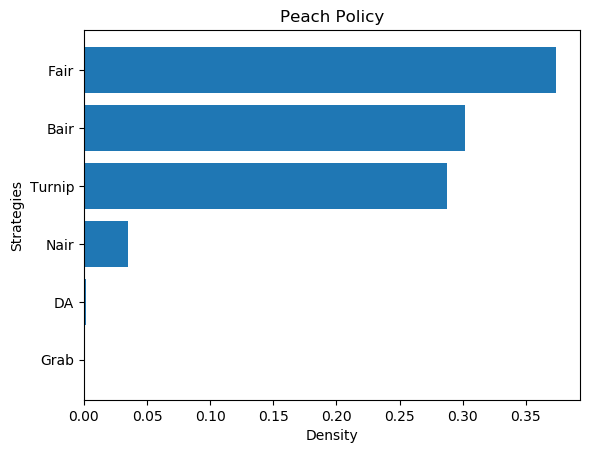

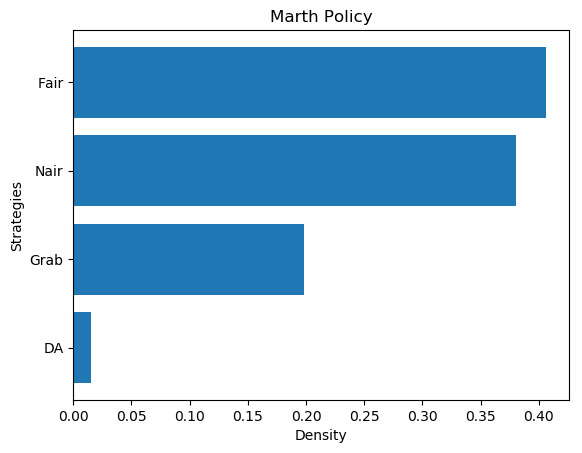

 66%|██████▌   | 66/100 [00:24<00:14,  2.40it/s]

Iteration  66


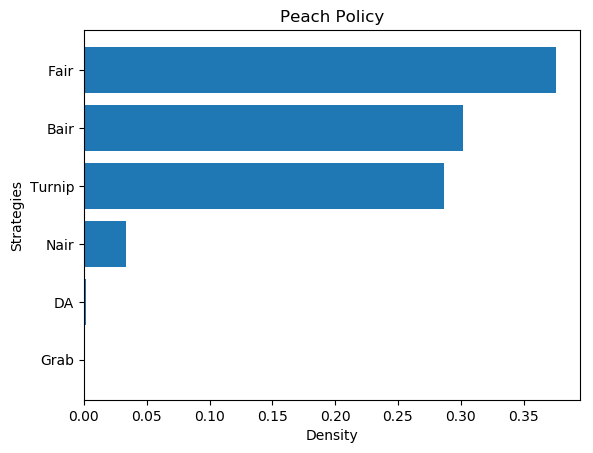

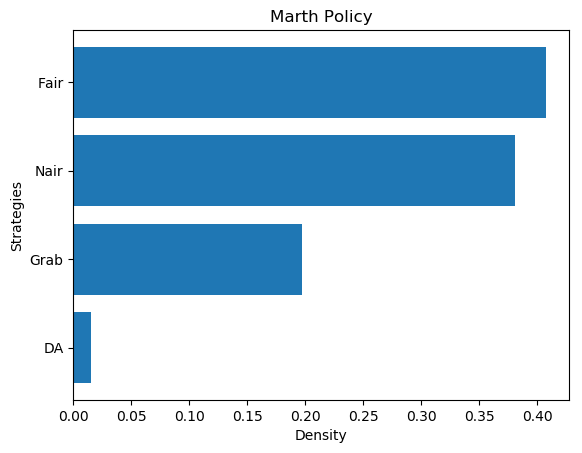

 67%|██████▋   | 67/100 [00:24<00:13,  2.49it/s]

Iteration  67


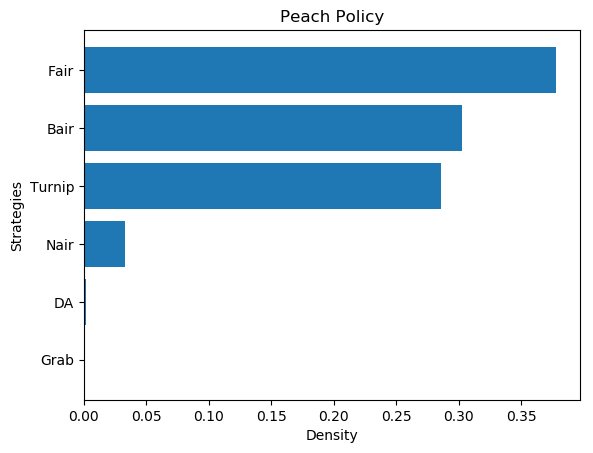

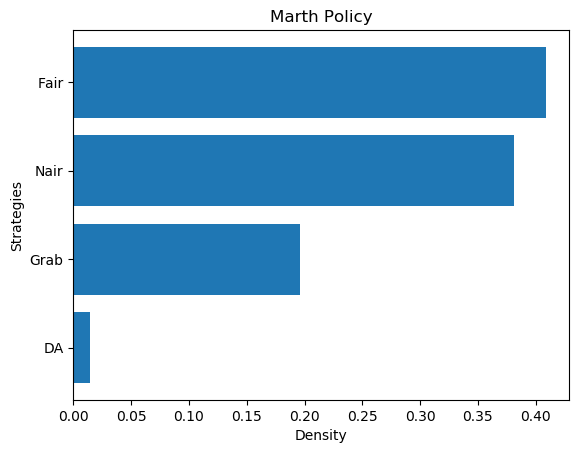

 68%|██████▊   | 68/100 [00:24<00:13,  2.44it/s]

Iteration  68


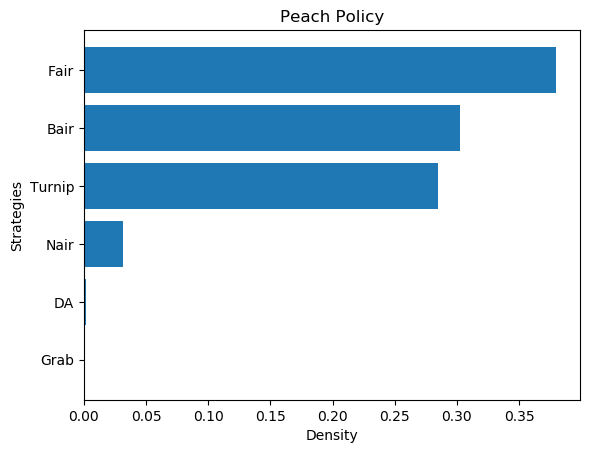

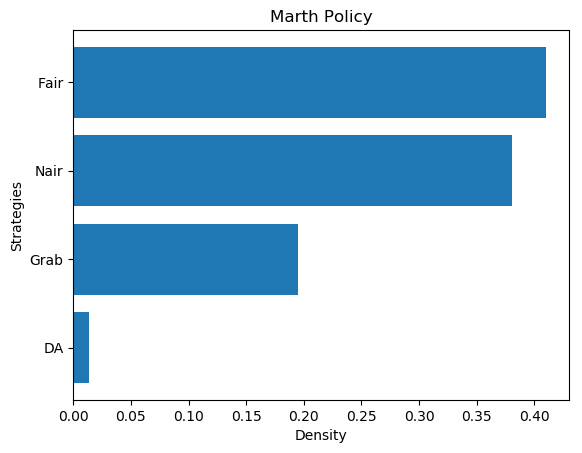

 69%|██████▉   | 69/100 [00:25<00:12,  2.40it/s]

Iteration  69


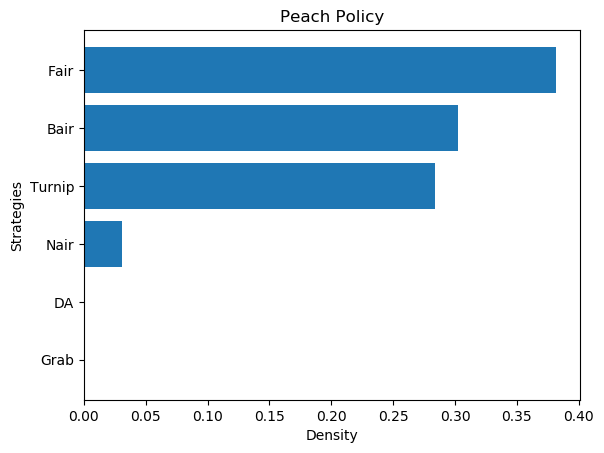

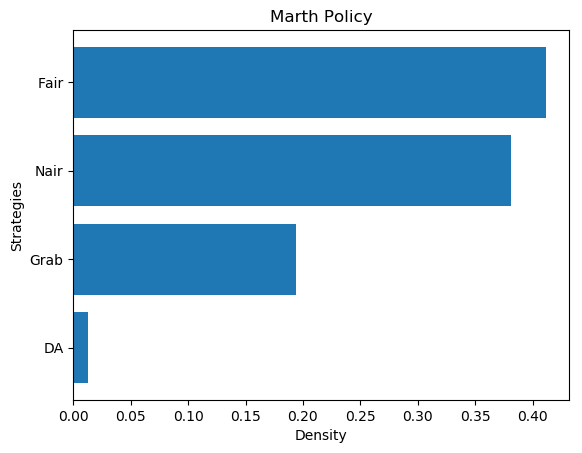

 70%|███████   | 70/100 [00:25<00:12,  2.44it/s]

Iteration  70


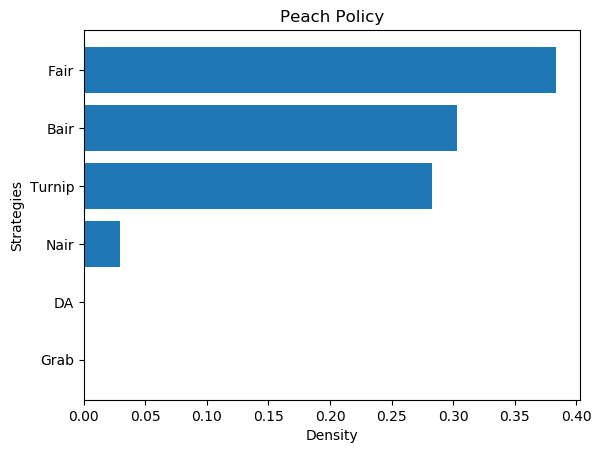

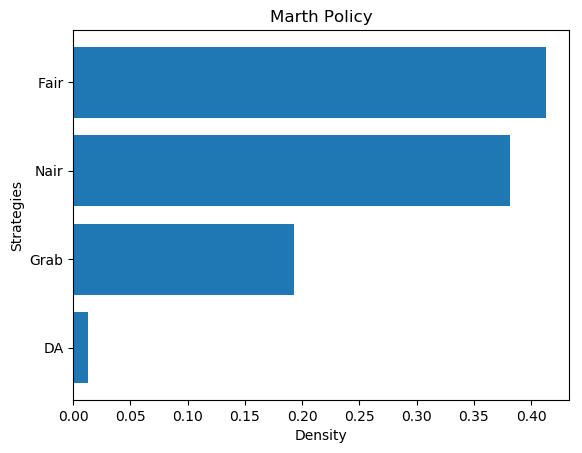

 71%|███████   | 71/100 [00:26<00:11,  2.50it/s]

Iteration  71


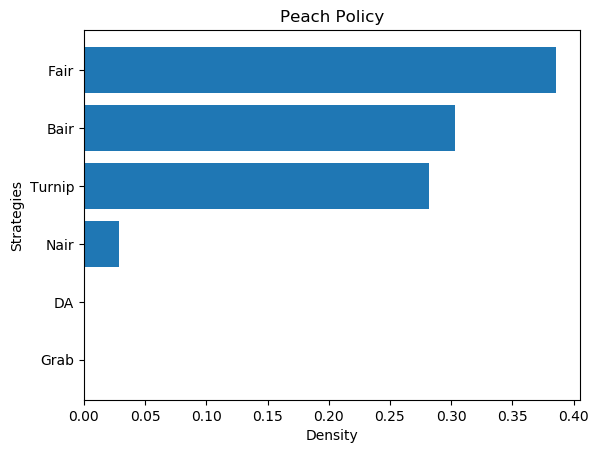

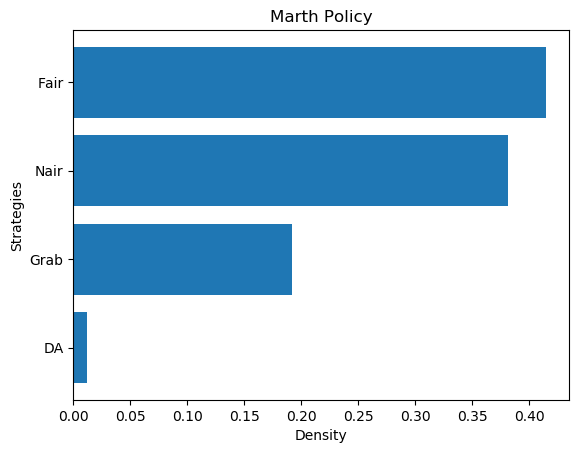

 72%|███████▏  | 72/100 [00:26<00:11,  2.53it/s]

Iteration  72


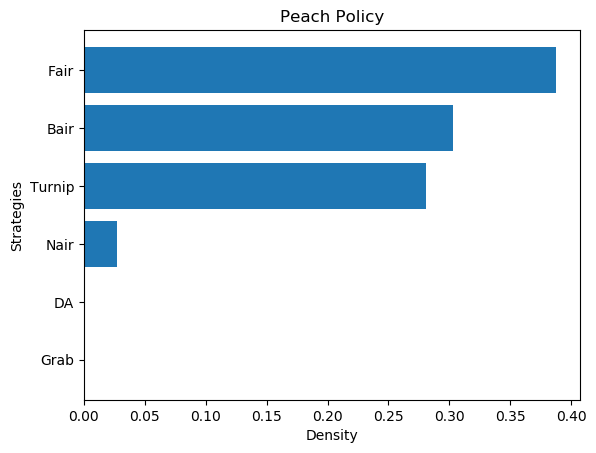

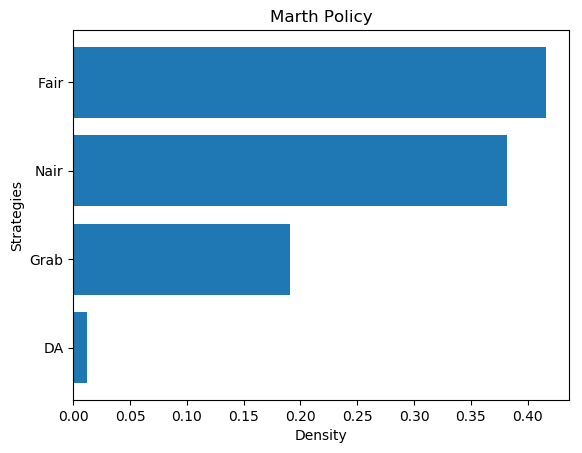

 73%|███████▎  | 73/100 [00:26<00:10,  2.68it/s]

Iteration  73


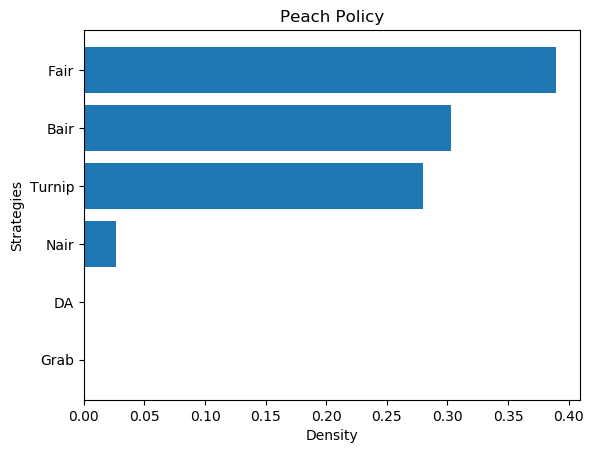

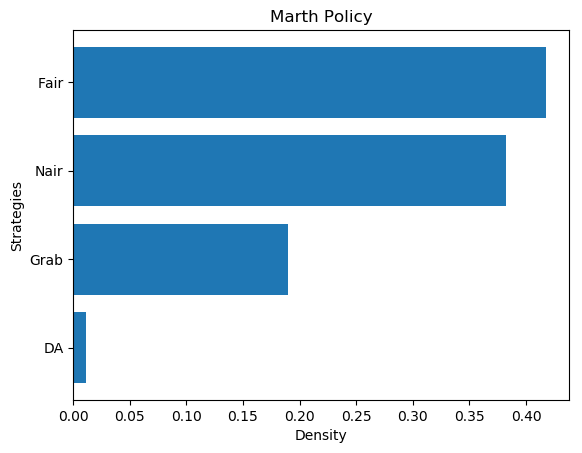

 74%|███████▍  | 74/100 [00:27<00:09,  2.66it/s]

Iteration  74


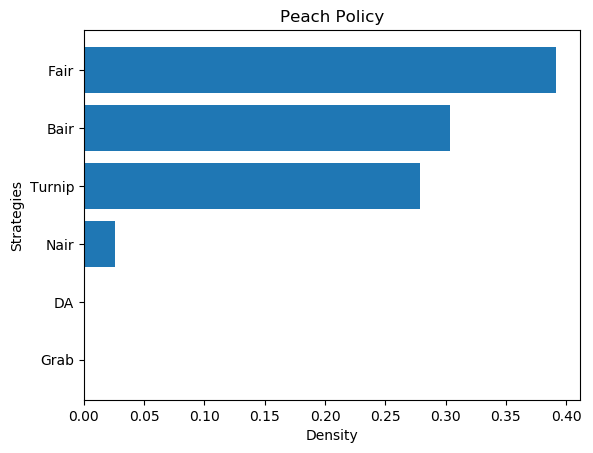

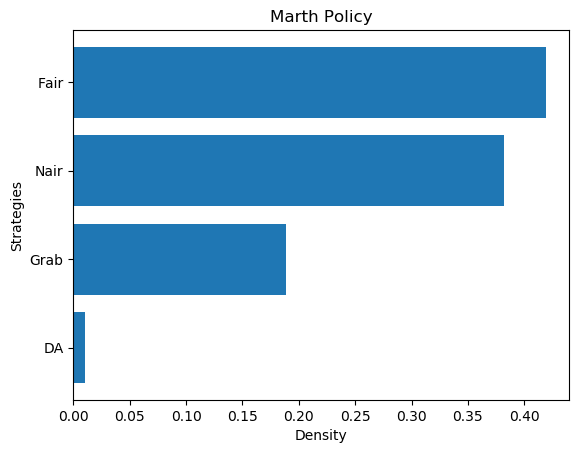

 75%|███████▌  | 75/100 [00:27<00:09,  2.56it/s]

Iteration  75


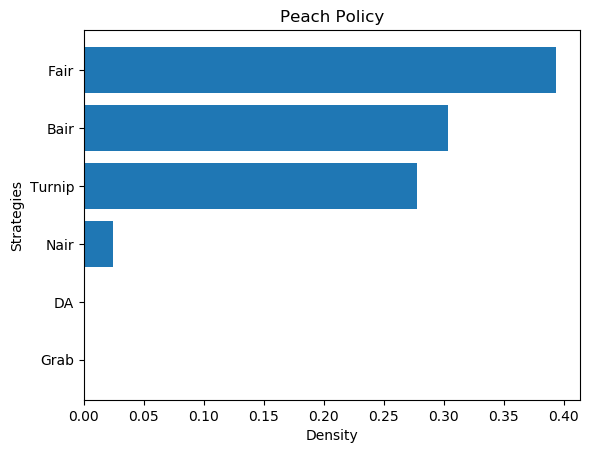

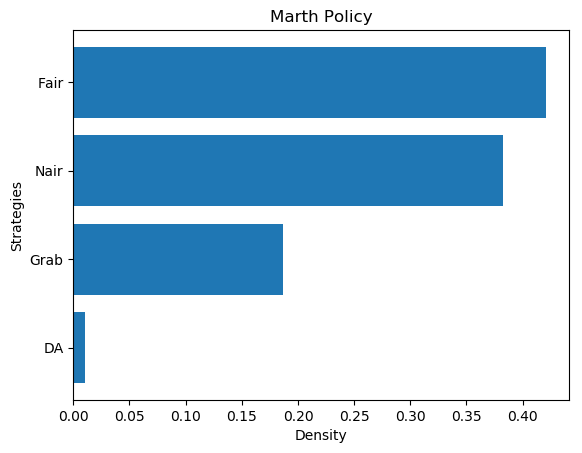

 76%|███████▌  | 76/100 [00:28<00:09,  2.57it/s]

Iteration  76


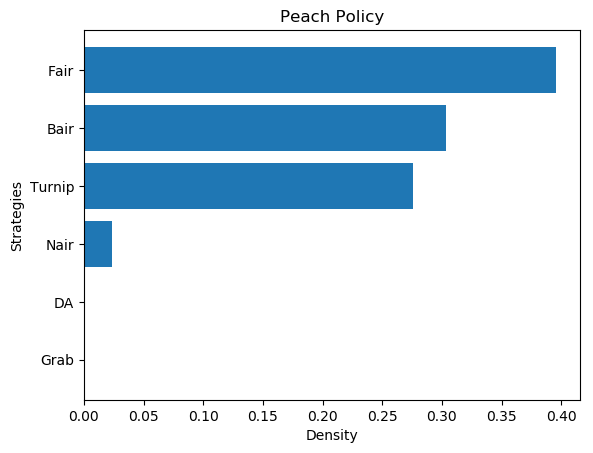

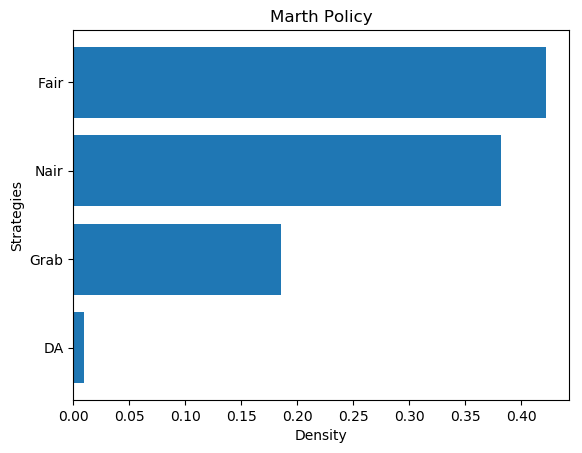

 77%|███████▋  | 77/100 [00:28<00:09,  2.55it/s]

Iteration  77


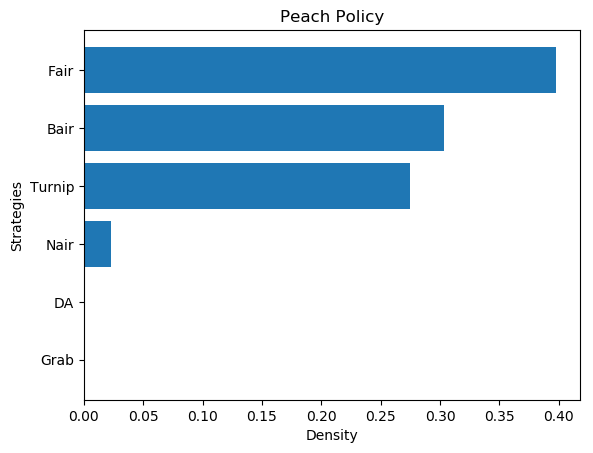

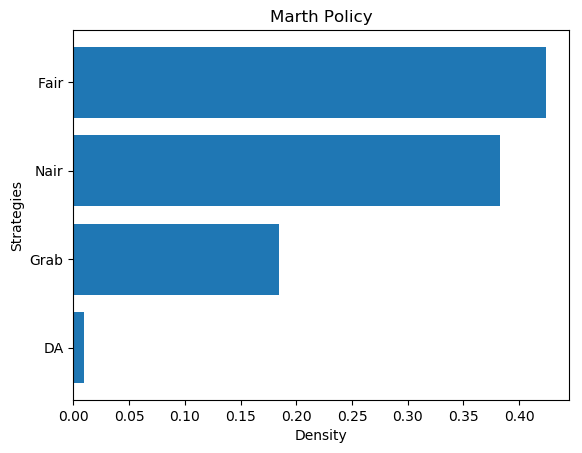

 78%|███████▊  | 78/100 [00:28<00:08,  2.55it/s]

Iteration  78


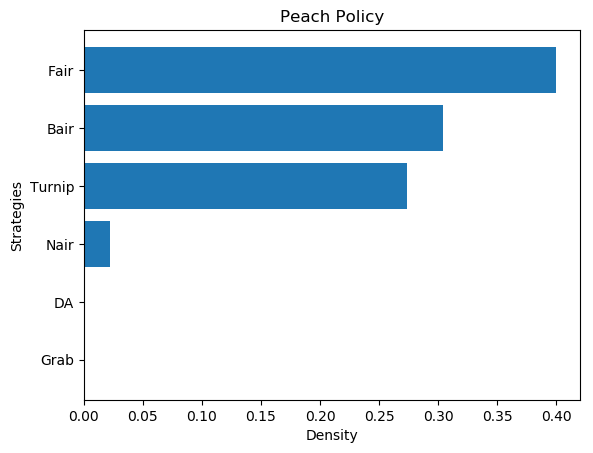

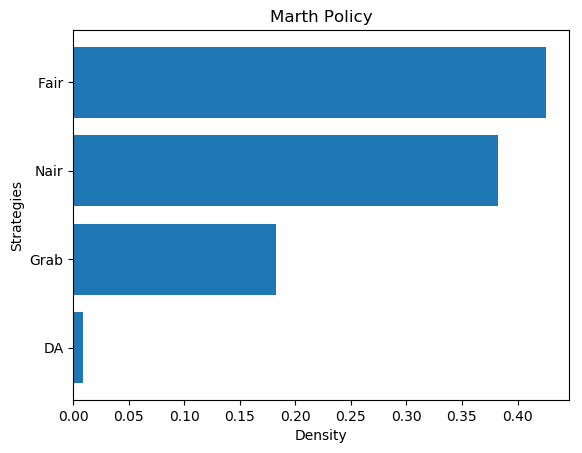

 79%|███████▉  | 79/100 [00:29<00:08,  2.56it/s]

Iteration  79


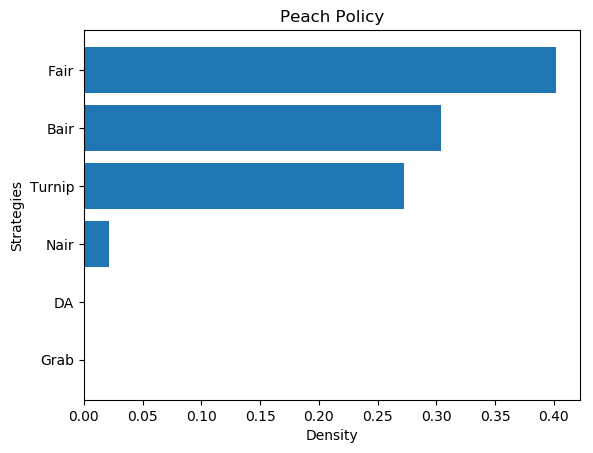

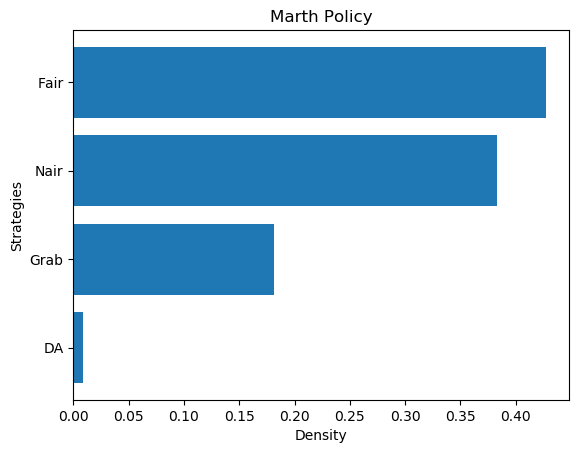

 80%|████████  | 80/100 [00:29<00:08,  2.41it/s]

Iteration  80


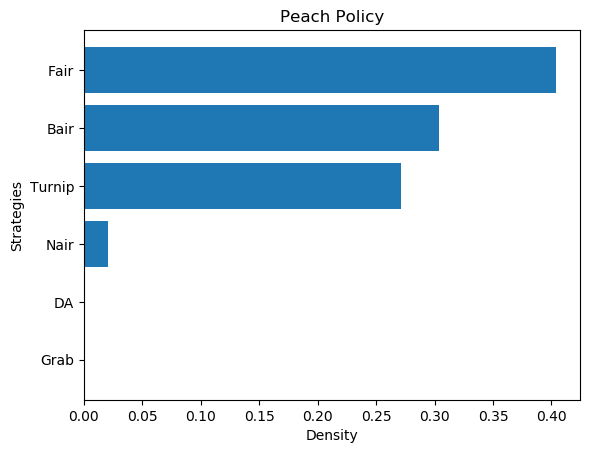

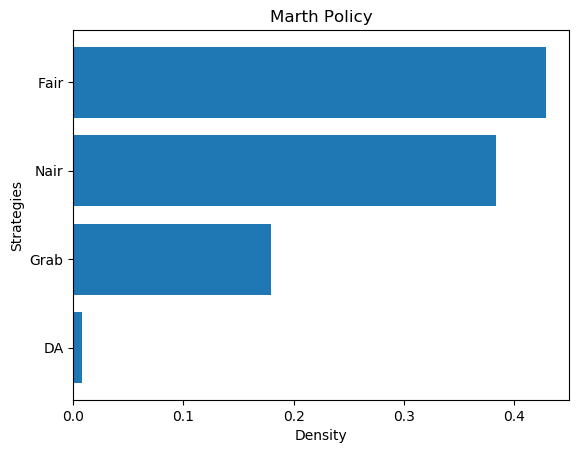

 81%|████████  | 81/100 [00:30<00:07,  2.55it/s]

Iteration  81


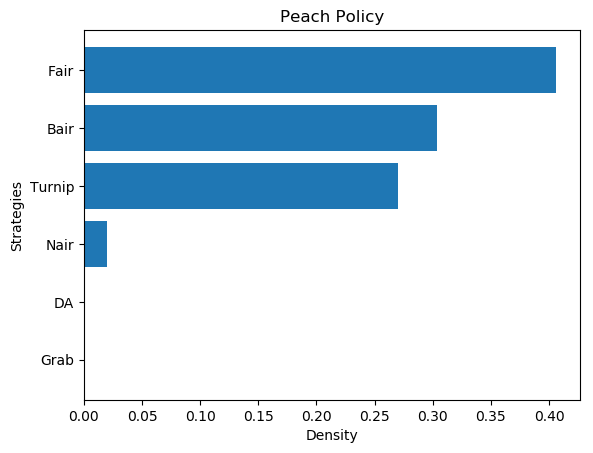

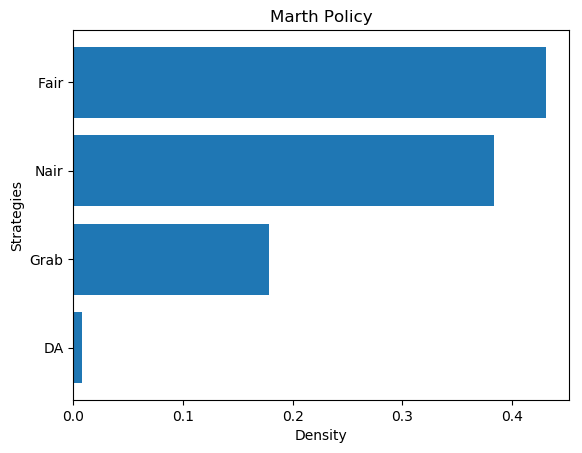

 82%|████████▏ | 82/100 [00:30<00:07,  2.57it/s]

Iteration  82


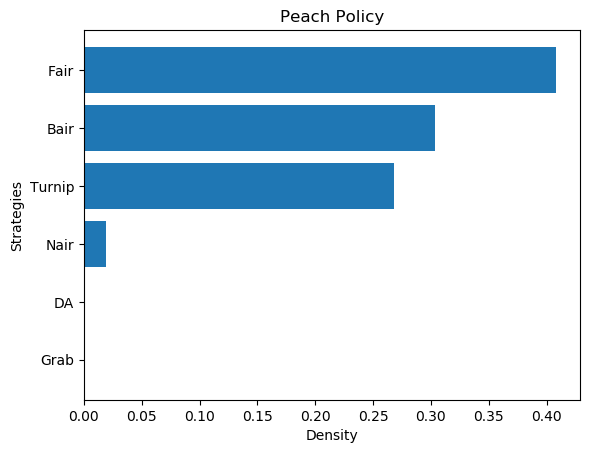

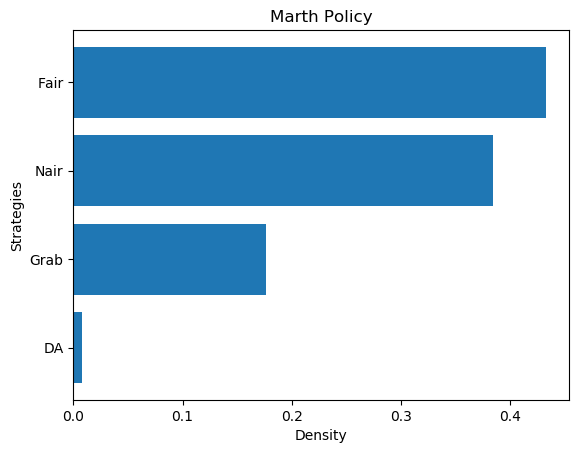

 83%|████████▎ | 83/100 [00:30<00:06,  2.57it/s]

Iteration  83


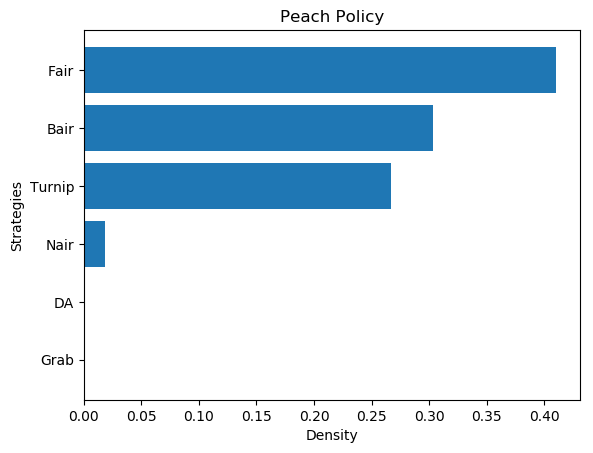

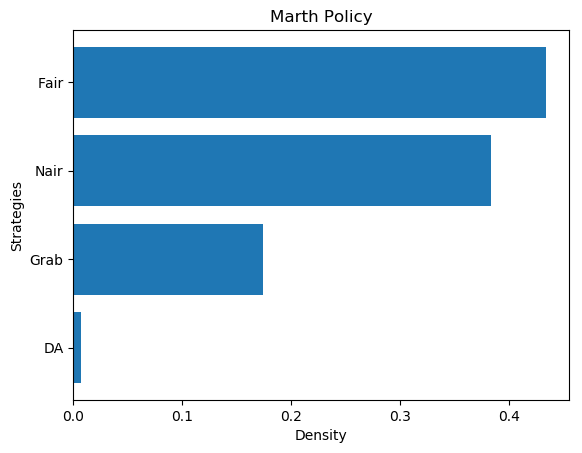

 84%|████████▍ | 84/100 [00:31<00:06,  2.62it/s]

Iteration  84


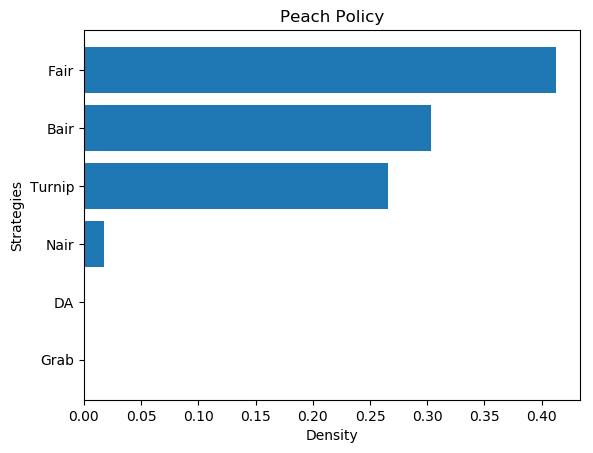

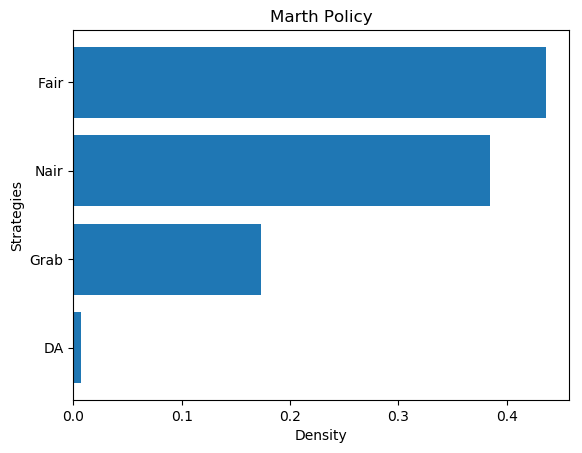

 85%|████████▌ | 85/100 [00:31<00:05,  2.75it/s]

Iteration  85


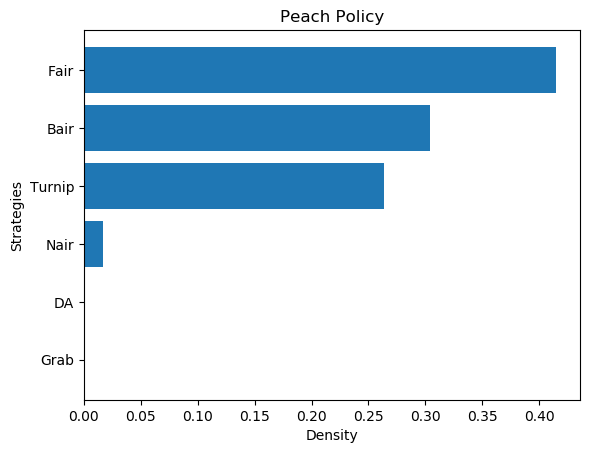

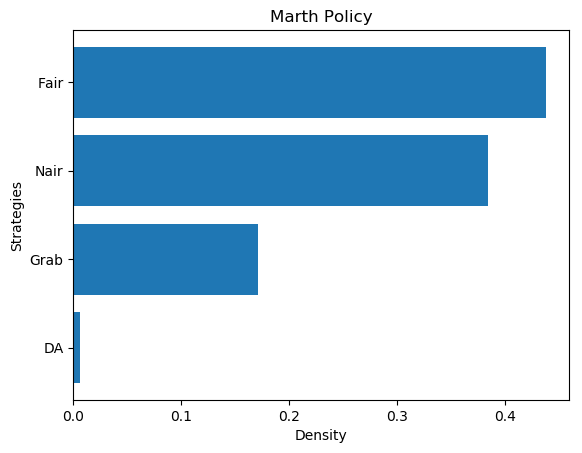

 86%|████████▌ | 86/100 [00:31<00:05,  2.66it/s]

Iteration  86


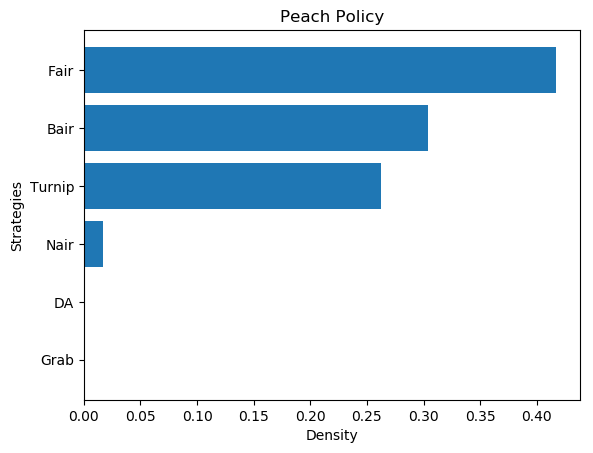

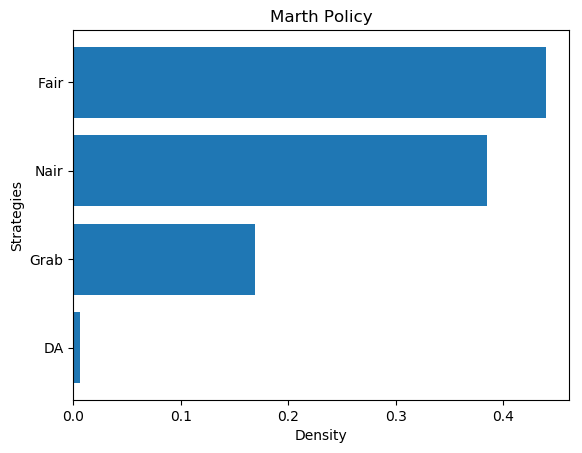

 87%|████████▋ | 87/100 [00:32<00:04,  2.67it/s]

Iteration  87


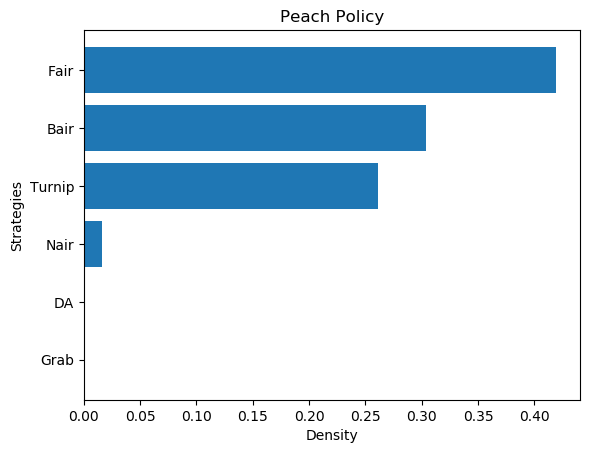

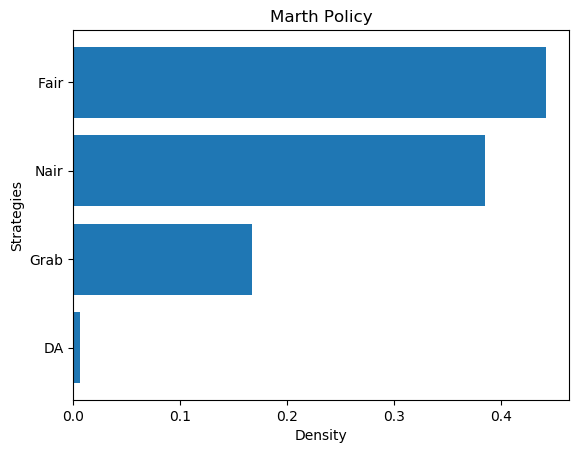

 88%|████████▊ | 88/100 [00:32<00:04,  2.62it/s]

Iteration  88


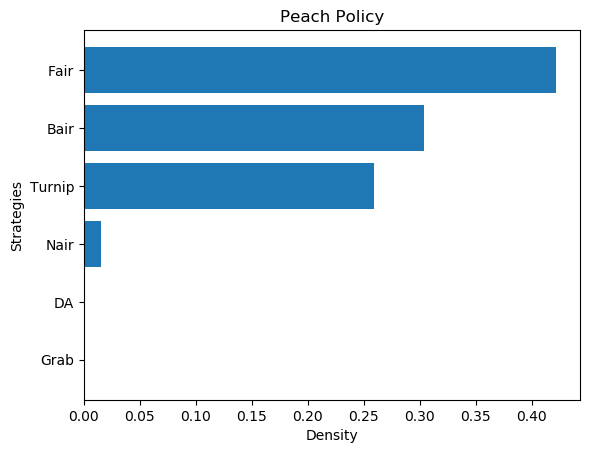

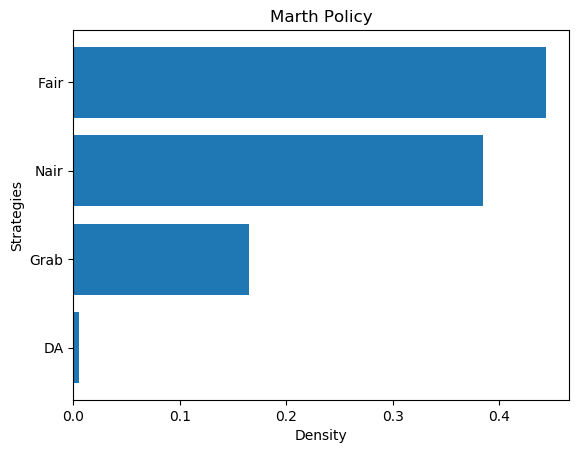

 89%|████████▉ | 89/100 [00:33<00:04,  2.40it/s]

Iteration  89


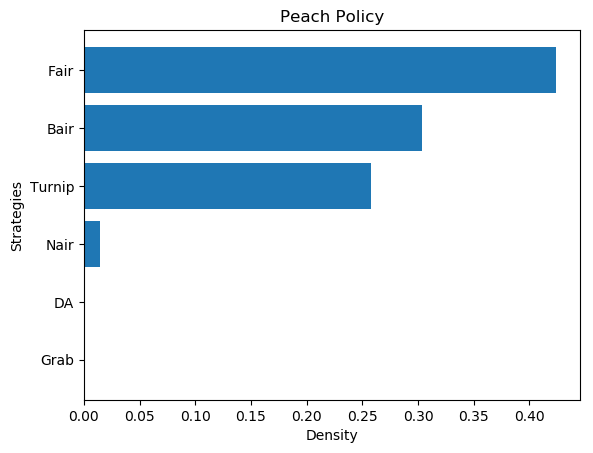

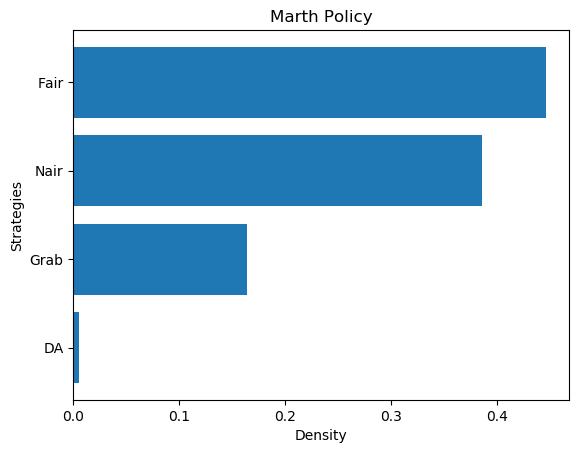

 90%|█████████ | 90/100 [00:33<00:04,  2.38it/s]

Iteration  90


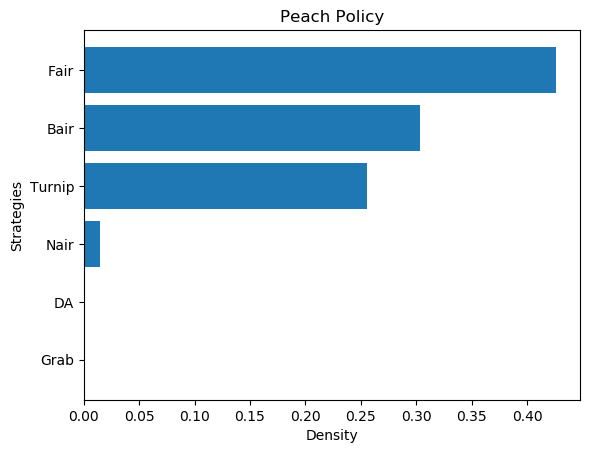

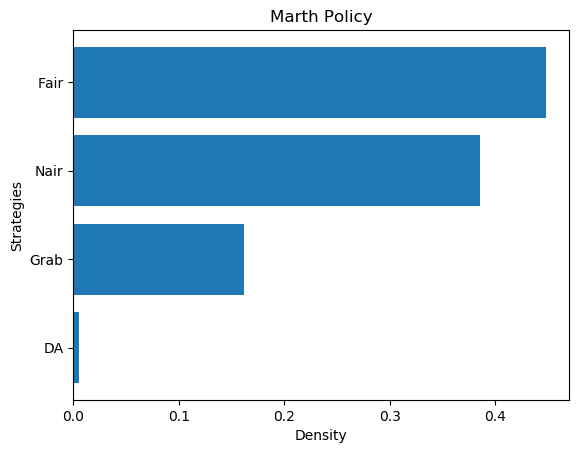

 91%|█████████ | 91/100 [00:34<00:03,  2.46it/s]

Iteration  91


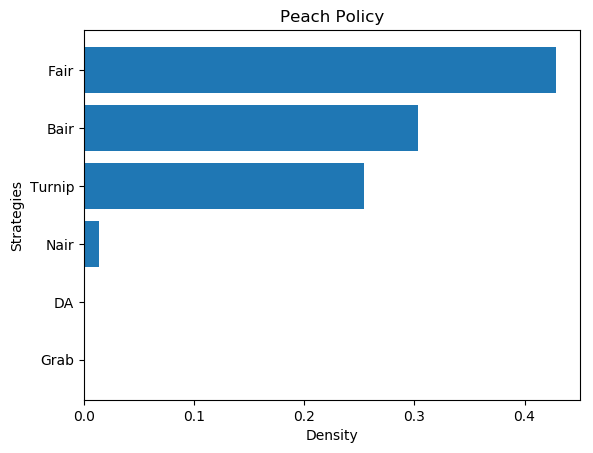

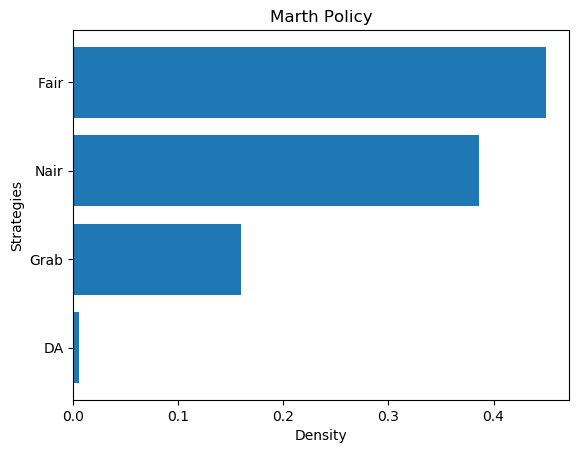

 92%|█████████▏| 92/100 [00:34<00:03,  2.56it/s]

Iteration  92


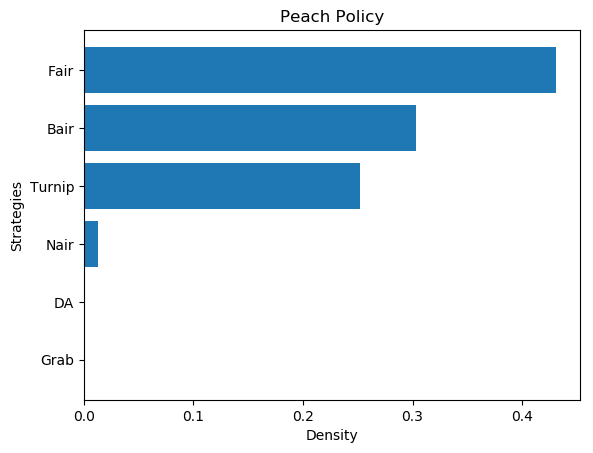

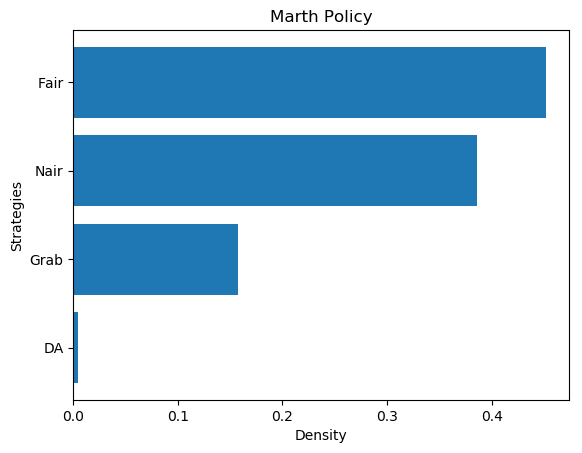

 93%|█████████▎| 93/100 [00:34<00:02,  2.56it/s]

Iteration  93


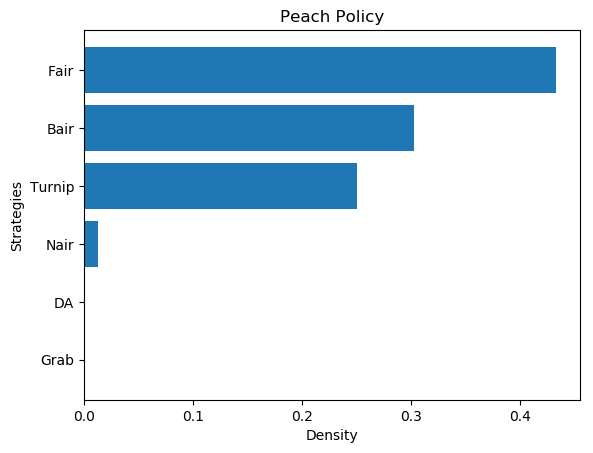

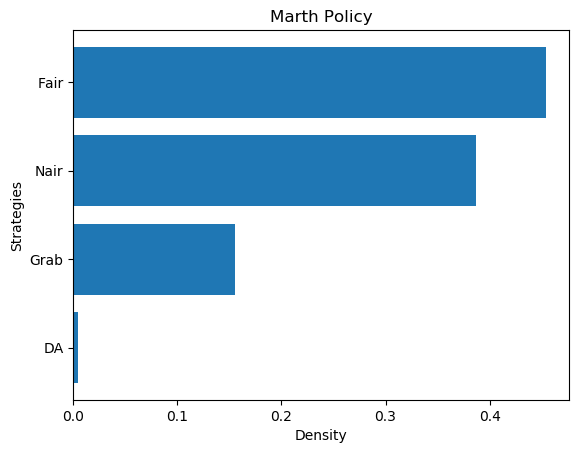

 94%|█████████▍| 94/100 [00:35<00:02,  2.62it/s]

Iteration  94


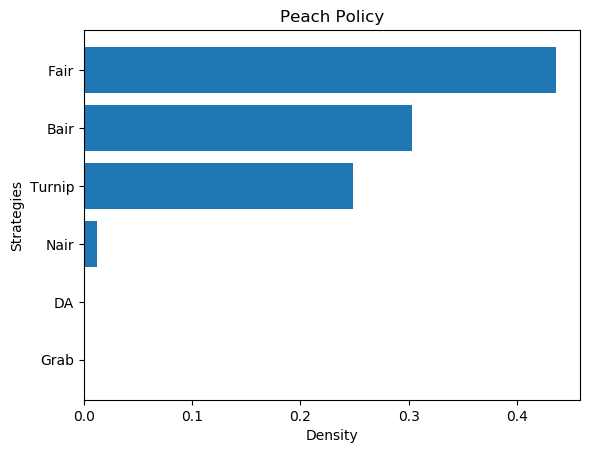

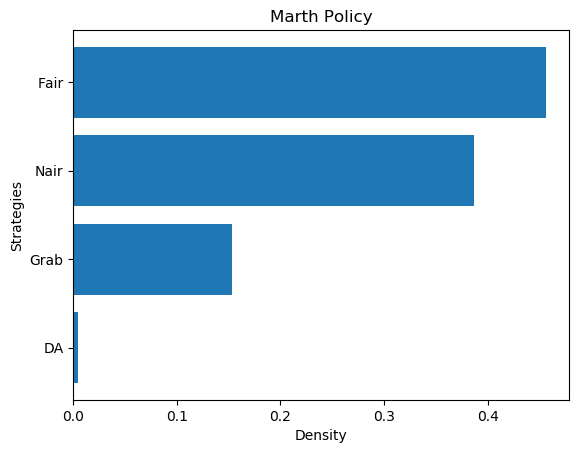

 95%|█████████▌| 95/100 [00:35<00:01,  2.58it/s]

Iteration  95


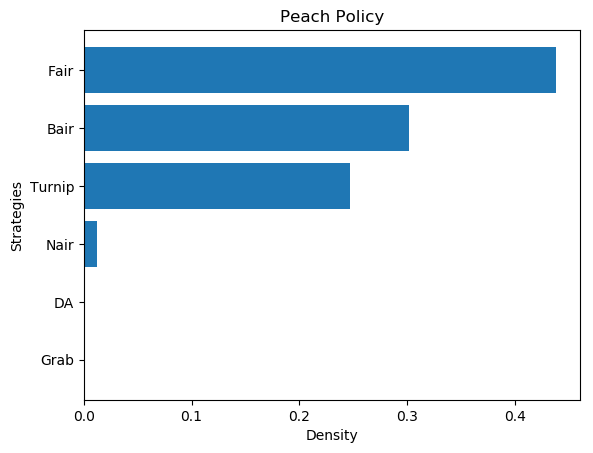

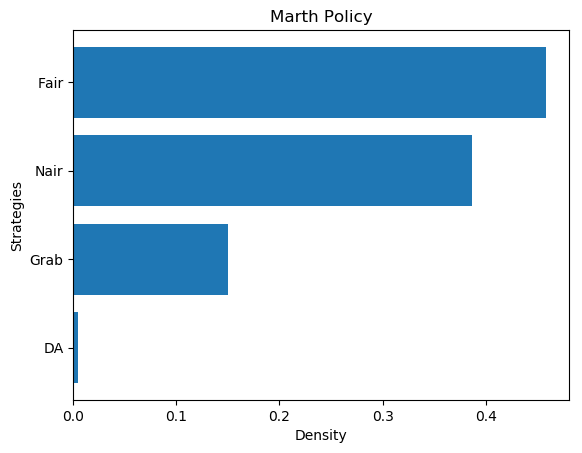

 96%|█████████▌| 96/100 [00:35<00:01,  2.52it/s]

Iteration  96


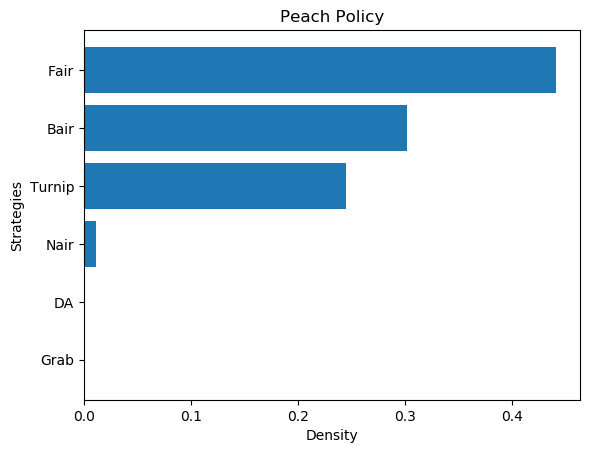

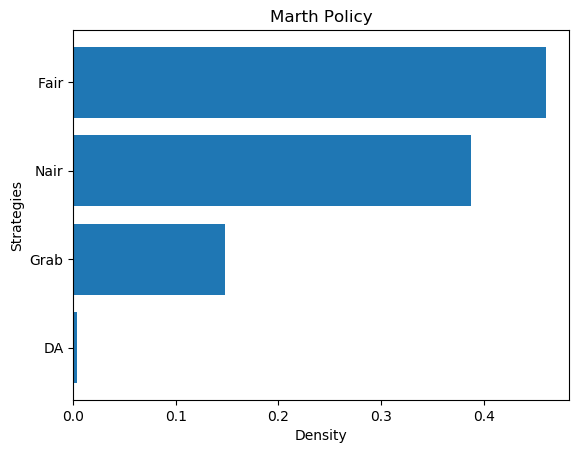

 97%|█████████▋| 97/100 [00:36<00:01,  2.44it/s]

Iteration  97


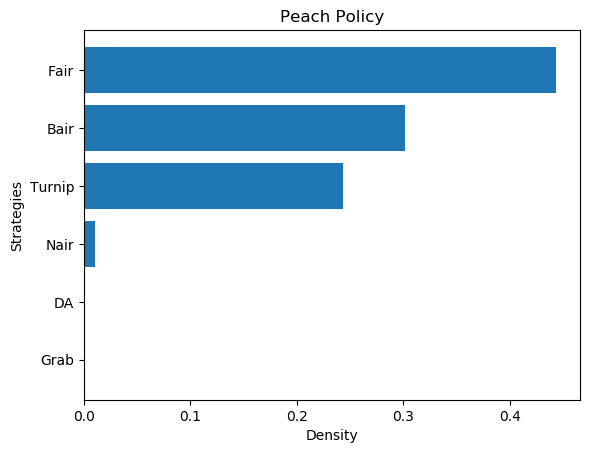

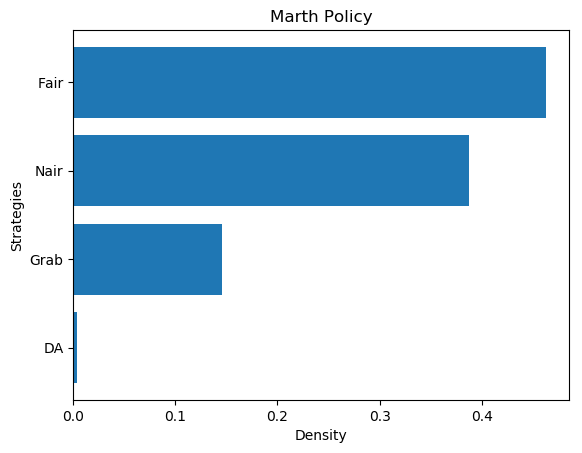

 98%|█████████▊| 98/100 [00:36<00:00,  2.52it/s]

Iteration  98


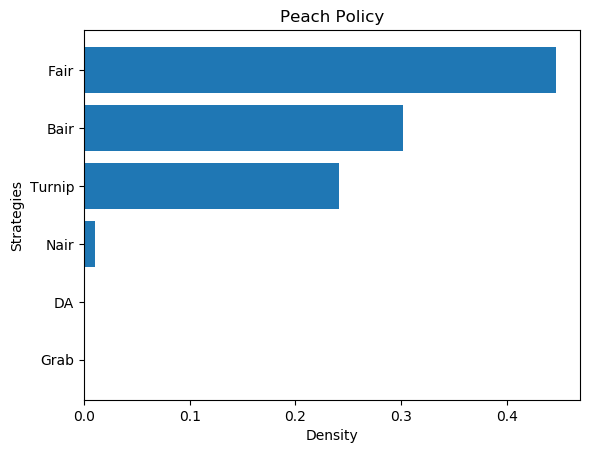

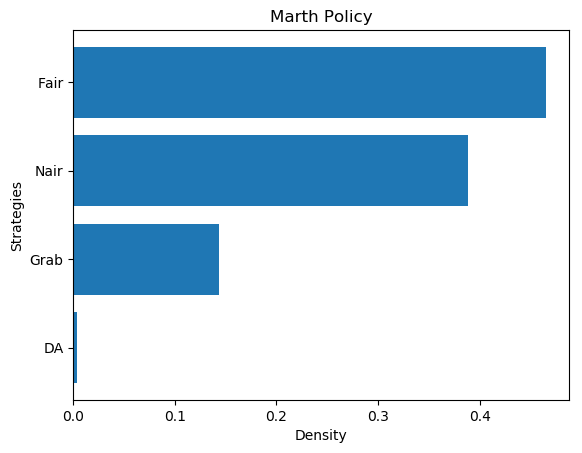

 99%|█████████▉| 99/100 [00:37<00:00,  2.50it/s]

Iteration  99


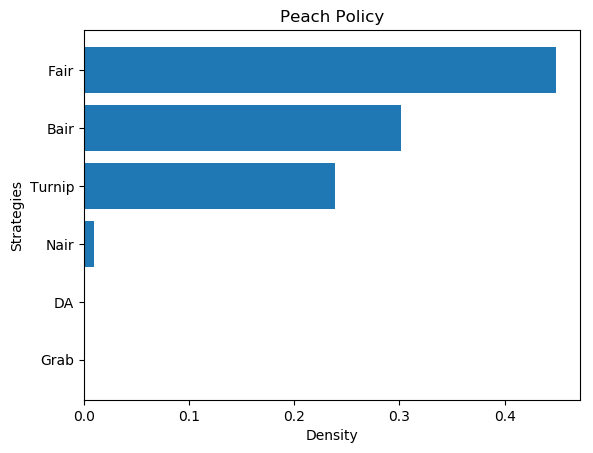

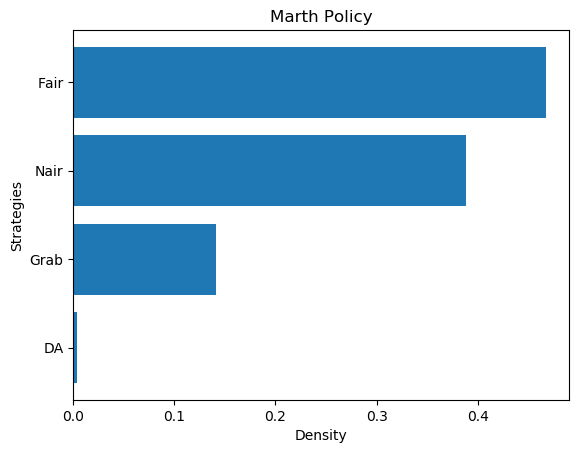

100%|██████████| 100/100 [00:37<00:00,  2.62it/s]


In [11]:
#We will generate our dual variables.. intialize them to 0 and attempt to constuct
#a mixed strategy from it
#We will generate our dual variables, keep in mind each player has different options
dual_variables = {}
for p1_action in p1_space:
    for p1_alt in p1_space:
        if p1_action is not p1_alt:
            joint_action = (1, p1_action, p1_alt)
            dual_variables[joint_action] = 0
            
for p2_action in p2_space:
    for p2_alt in p2_space:
        if p2_action is not p2_alt:
            joint_action = (2, p2_action, p2_alt)
            dual_variables[joint_action] = 0
        
log_grad_descent(dual_variables, verbose=True, rounds=100)

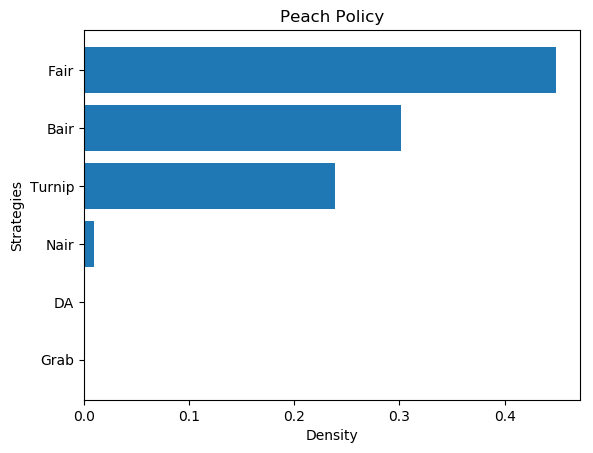

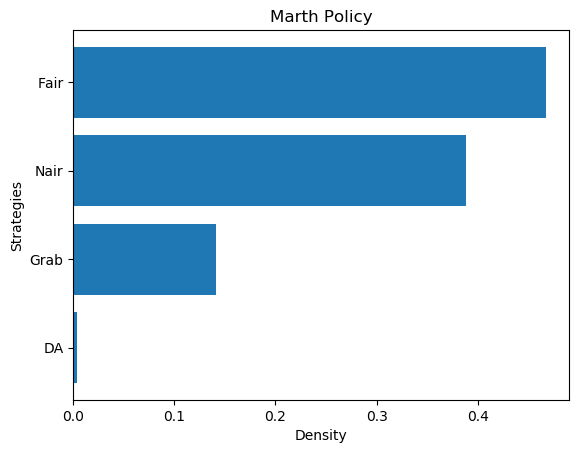

In [12]:
plot(dual_variables)